# Tratamento dos Dados



### Carregar os dados

In [1]:
import pandas as pd

DATA_PATH = './teste_indicium_precificacao.csv'

data = pd.read_csv(DATA_PATH)
# geo_data = data[['latitude', 'longitude', 'price']].copy()
# data_neighborhood = data[['bairro_group', 'bairro', 'price', 'room_type']].copy()
# data_name = data[['nome', 'price']].copy()
data_original = data.copy()
data.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


### Verificação e tratameto de valores nulos

In [2]:
data.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

#### Tratamento da coluna `reviews_por_mes`:

A coluna `reviews_por_mes` possui 10.052 valores nulos em um total de 48.894, representando uma grande parcela de dados nulos. Ao analisar a correlação entre a coluna `price` e `reviews_por_mes`, percebe-se uma correlação inversa de aproximadamente 1,8%, um valor pouco significativo. Dado que o problema atual não foca nesses dados, será preenchido com 0.



c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


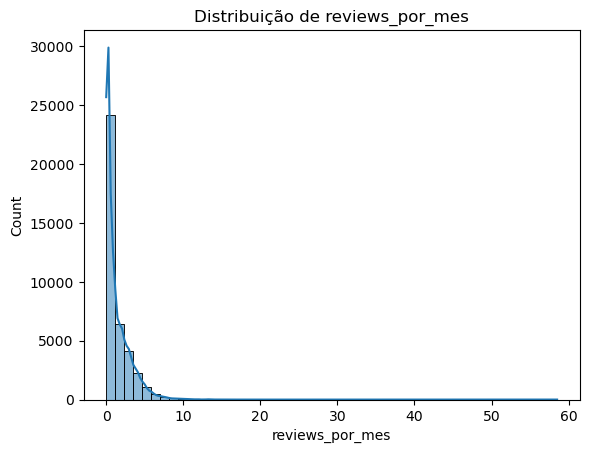

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['reviews_por_mes'], kde=True, bins=50)
plt.title('Distribuição de reviews_por_mes')
plt.show()

In [4]:
correlation = data[['reviews_por_mes', 'price']].corr(method='spearman')
print("Correlação entre 'ultima_review' e 'price':")
print(correlation)

Correlação entre 'ultima_review' e 'price':
                 reviews_por_mes     price
reviews_por_mes         1.000000 -0.018515
price                  -0.018515  1.000000


In [5]:
data['reviews_por_mes'] = data['reviews_por_mes'].fillna(0)
null_counts_reviews_por_mes_after = data['reviews_por_mes'].isnull().sum()
print(f"Valores nulos na coluna 'reviews_por_mes' após preenchimento: {null_counts_reviews_por_mes_after}")

Valores nulos na coluna 'reviews_por_mes' após preenchimento: 0


#### Tratameto da coluna `ultima_review`:

Dado que a coluna ultima_review possui 10.052 valores nulos em um total de 48.894 registros e uma correlação de 8,5% com a coluna price, a melhor forma de tratamento é manter todos os registros sem introduzir vieses significativos na análise, por isso vou preencher com uma data arbitratia de 2011-01-01 que é o primeiro ano de interesse, indicando que não houveram avaliações desde a data de interesse inicial.

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


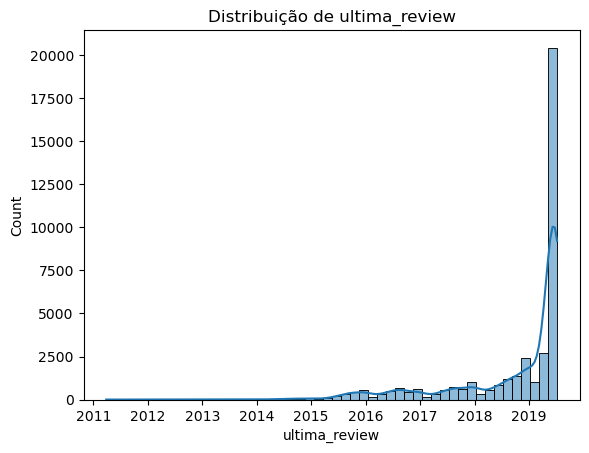

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
data['ultima_review'] = pd.to_datetime(data['ultima_review'], errors='coerce')
sns.histplot(data['ultima_review'], kde=True, bins=50)
plt.title('Distribuição de ultima_review')
plt.show()

In [7]:
correlation = data[['ultima_review', 'price']].corr(method='pearson')
print("Correlação entre 'ultima_review' e 'price':")
print(correlation)

Correlação entre 'ultima_review' e 'price':
               ultima_review     price
ultima_review       1.000000 -0.085239
price              -0.085239  1.000000


In [8]:
data['ultima_review'] = data['ultima_review'].fillna(pd.Timestamp('2011-01-01'))
null_counts_ultima_review_after = data['ultima_review'].isnull().sum()
print(f"Valores nulos na coluna 'ultima_review' após preenchimento: {null_counts_ultima_review_after}")

Valores nulos na coluna 'ultima_review' após preenchimento: 0


#### Tratamento da colua `host_name`:

O tratamento selecionado para essa feature foi sua remoção pois ela está diretamente relacionada a feature `host_id` que já supre a sua presença no dataset, assim é possível diminuir a complexidade e dimencionalidade da base de dados.

In [ ]:
data = data.drop('host_name', axis=1)
data.head()

,id,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2011-01-01,0.00,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


#### Tratamento da coluna `nome`:

A coluna possui poucos valores nulos em comparação com o cojunto total de dados e por isso esses valores nulos serão removidos pois não possuem grade grande sigificacia.

##### Tratamento dos dados textuais:

Serão aplicadas remoções de caracteres especiais, stopwords, tokenização e lematização, transfomando os dados em uma matriz tf-idf para estudar futuramente sua performace para determinar o preço de um porduto.

In [10]:
! pip install spacy
! python -m spacy download en_core_web_sm

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.2/12.8 MB 5.0 MB/s eta 0:00:03
     - -------------------------------------- 0.5/12.8 MB 5.3 MB/s eta 0:00:03
     --- ------------------------------------ 1.0/12.8 MB 7.0 MB/s eta 0:00:02
     ---- ----------------------------------- 1.6/12.8 MB 8.4 MB/s eta 0:00:02
     ------- -------------------------------- 2.3/12.8 MB 9.6 MB/s eta 0:00:02
     --------- ------------------------------ 3.0/12.8 MB 10.2 MB/s eta 0:00:01
     ----------- ---------------------------- 3.8/12.8 MB 10.7 MB/s eta 0:00:01
     ------------- -------------------------- 4.3/12.8 MB 10.6 MB/s eta 0:00:01
     --------------- ------------------------ 4.9/12.8 MB 10.8 MB/s eta 0:00:01
     ---------------- ----------------------- 5.2/12.8 MB 10.7 MB/s eta 0:00:01
     ------------------ --------------------- 5.9/12.8 MB 10.8 MB/s eta 0:00:01
     -------------------- ------------------- 6.6/12.

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\GessicadeSouzaSilva\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GessicadeSouzaSilva\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GessicadeSouzaSilva\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
def clean_text(text):
    text = str(text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\d{1,2}/\d{1,2}/\d{4}', '', text)
    return text

def stopword_removal(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

def lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

data['nome'] = data['nome'].apply(clean_text)
data['nome'] = data['nome'].apply(stopword_removal)
data['nome'] = data['nome'].apply(lemmatization)
name_column_text = data['nome'].apply(lambda x: ' '.join(x))
data.head()

,id,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,"[skylit, midtown, castle]",2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,"[village, harlemnew, york]",4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2011-01-01,0.00,1,365
2,3831,"[cozy, entire, floor, brownstone]",4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,"[entire, apt, spacious, studioloft, central, p...",7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,"[large, cozy, br, apartment, midtown, east]",7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_features=2000, ngram_range=(1,2))
nome_tfidf_matrix = vectorizer_tfidf.fit_transform(name_column_text)
data.head()

,id,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,"[skylit, midtown, castle]",2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,"[village, harlemnew, york]",4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2011-01-01,0.00,1,365
2,3831,"[cozy, entire, floor, brownstone]",4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,"[entire, apt, spacious, studioloft, central, p...",7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,"[large, cozy, br, apartment, midtown, east]",7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


##### Removendo a coluna do dataset

In [13]:
data = data.drop('nome', axis =1)
data.head()

,id,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2011-01-01,0.00,1,365
2,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


### Tratamento de Outliers

O tratamento de outliers é uma questão sensível pois o contexto dos dados é bastante relevante, algumas features do datase não se adequam a definição de outliers ou não possuem e não foram utilizadas na análise a seguir.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def detect_outliers(df, columns):
    outliers = pd.DataFrame(columns=['feature', 'total_data', 'outliers_superiores', 'outliers_inferiores'])
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        
        total_data = df[column].count()
        outliers_superiores = df[df[column] > upper_bound][column].count()
        outliers_inferiores = df[df[column] < lower_bound][column].count()
        
        outliers = pd.concat([outliers, pd.DataFrame({
            'feature': [column],
            'total_data': [total_data],
            'outliers_superiores': [outliers_superiores],
            'outliers_inferiores': [outliers_inferiores]
        })], ignore_index=True)
    
    return outliers

columns_to_analyze = ['price', 'minimo_noites', 'reviews_por_mes', 'calculado_host_listings_count']
outliers_df = detect_outliers(data, columns_to_analyze)
print(tabulate(outliers_df, headers='keys', tablefmt='grid'))

+----+-------------------------------+--------------+-----------------------+-----------------------+
|    | feature                       |   total_data |   outliers_superiores |   outliers_inferiores |
+====+===============================+==============+=======================+=======================+
|  0 | price                         |        48894 |                  2972 |                     0 |
+----+-------------------------------+--------------+-----------------------+-----------------------+
|  1 | minimo_noites                 |        48894 |                  6607 |                     0 |
+----+-------------------------------+--------------+-----------------------+-----------------------+
|  2 | reviews_por_mes               |        48894 |                  3312 |                     0 |
+----+-------------------------------+--------------+-----------------------+-----------------------+
|  3 | calculado_host_listings_count |        48894 |                  7080 |     

Os dados apresentados indicam níveis altos de outliers superiores, e a modelagem que será realizada a seguir poderia ser afetada por tal aspecto caso não se escolham algoritmos robustos de machine learning, pouco sensíveis a outliers. Essa abordagem é preferível, pois, dado o contexto dos dados e visto que, em histórico de datasets semelhantes a esse, features como price tendem a possuir valores bastante altos que são condizentes com a realidade, assim como nas variáveis minimo_noites, que influencia diretamente a coluna price, reviews_por_mes e calculado_host_listings_count também.

Para minimizar esse efeito dos outliers, serão aplicadas normalizações nos dados das features apresentadas a fim de minimizar seus impactos na modelagem.

A seguir é mostrado diferentes datasets open source que apresentam esse comportamento em relação a coluna price

+----+-----------+--------------+-----------------------+-----------------------+
|    | Dataset   |   Total Data |   Outliers Superiores |   Outliers Inferiores |
+====+===========+==============+=======================+=======================+
|  0 | Diamonds  |        53940 |                  3540 |                     0 |
+----+-----------+--------------+-----------------------+-----------------------+
|  1 | Tips      |          244 |                     9 |                     0 |
+----+-----------+--------------+-----------------------+-----------------------+
|  2 | MPG       |          398 |                     1 |                     0 |
+----+-----------+--------------+-----------------------+-----------------------+


c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


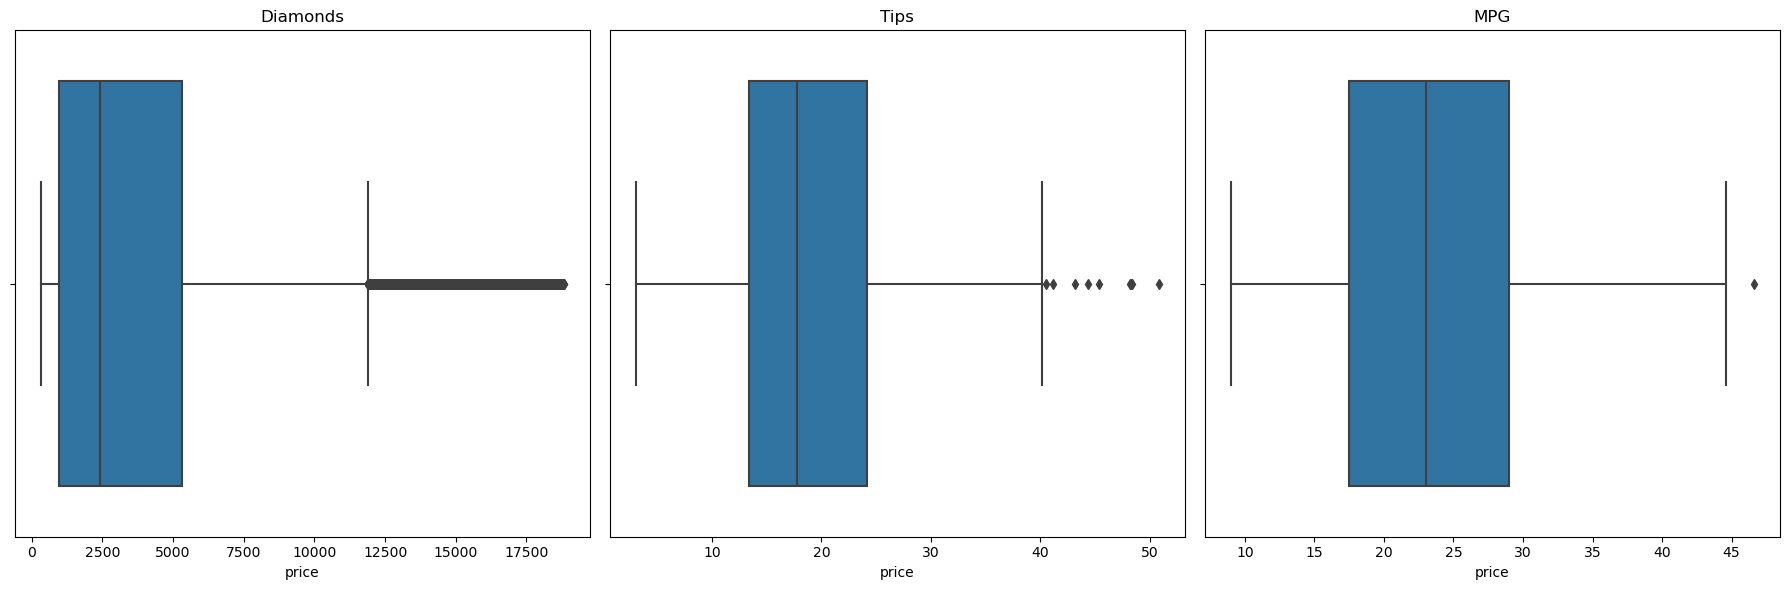

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    outliers_superiores = df[df[column] > upper_bound][column]
    outliers_inferiores = df[df[column] < lower_bound][column]
    
    return outliers_superiores, outliers_inferiores

# Carregar datasets open source
df1 = sns.load_dataset('diamonds')
df2 = sns.load_dataset('tips')
df3 = sns.load_dataset('mpg')

df1['price'] = df1['price']
df2['price'] = df2['total_bill']
df3['price'] = df3['mpg']

outliers_superiores_df1, outliers_inferiores_df1 = detect_outliers(df1, 'price')
outliers_superiores_df2, outliers_inferiores_df2 = detect_outliers(df2, 'price')
outliers_superiores_df3, outliers_inferiores_df3 = detect_outliers(df3, 'price')

tabela_outliers = pd.DataFrame({
    'Dataset': ['Diamonds', 'Tips', 'MPG'],
    'Total Data': [df1['price'].count(), df2['price'].count(), df3['price'].count()],
    'Outliers Superiores': [outliers_superiores_df1.count(), outliers_superiores_df2.count(), outliers_superiores_df3.count()],
    'Outliers Inferiores': [outliers_inferiores_df1.count(), outliers_inferiores_df2.count(), outliers_inferiores_df3.count()]
})

print(tabulate(tabela_outliers, headers='keys', tablefmt='grid'))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(data=df1, x='price', ax=axes[0]).set_title('Diamonds')
sns.boxplot(data=df2, x='price', ax=axes[1]).set_title('Tips')
sns.boxplot(data=df3, x='price', ax=axes[2]).set_title('MPG')
plt.tight_layout()
plt.show()

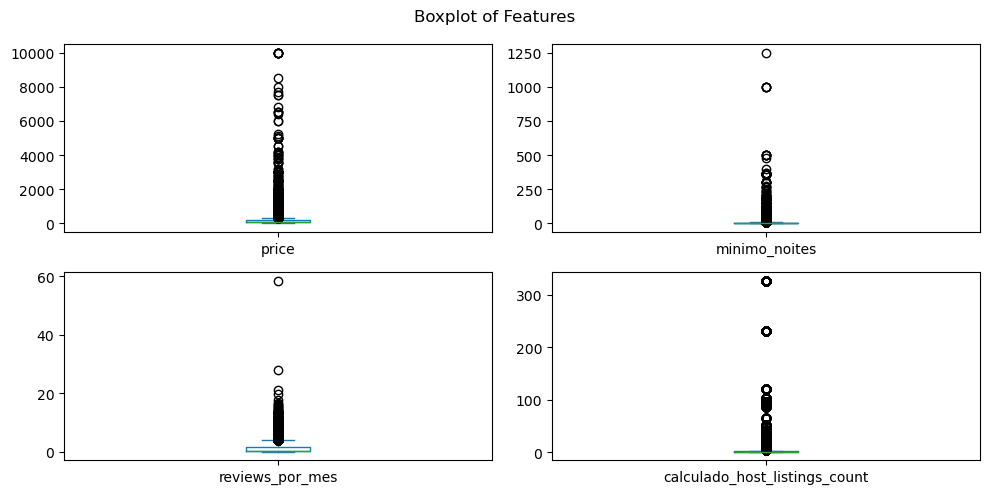

In [16]:
data[columns_to_analyze].plot(kind='box', subplots=True, layout=(2,2), figsize=(10,5), title='Boxplot of Features')
plt.tight_layout()
plt.show()

### Normalizações e Padronizações dos Dados

Para facilitar eventuais processos com os dados é necessário tratar dados categoricos e normalizar dados numericos para que os algoritmos de machine learning consigam trabalhar melhor sobre essas informações apresentadas.

como os dados da feature room_type não possuem diversas categorias que pudessem descatacterizar os dados normalizado foi realizado um label encoder onde cada categoria recebe um valor numérico e assim não é necessário aumentar o número de features do dataset.

#### Distribução dos Dados Númericos

Para analisar como estão espaçados os dados das features e assim determinar qual é a melhor abordagem de acordo com o conjunto, lembrando também da analise anterior sobre outliers de determinadas colunas e como eles impactavam os dados anteriormente já foi determinado seu tratamento.

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


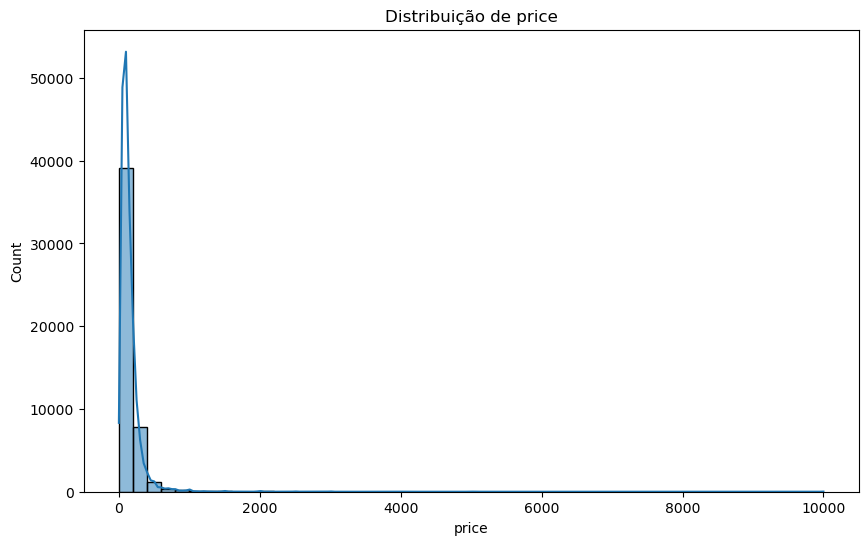

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


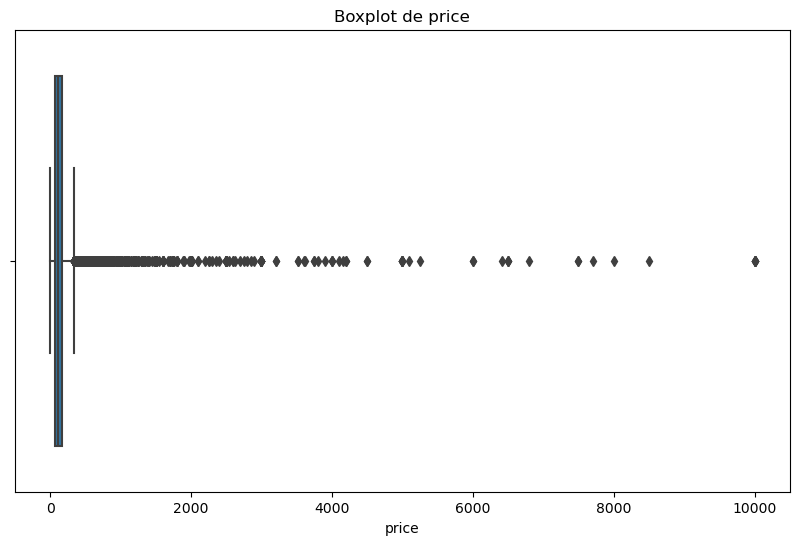

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


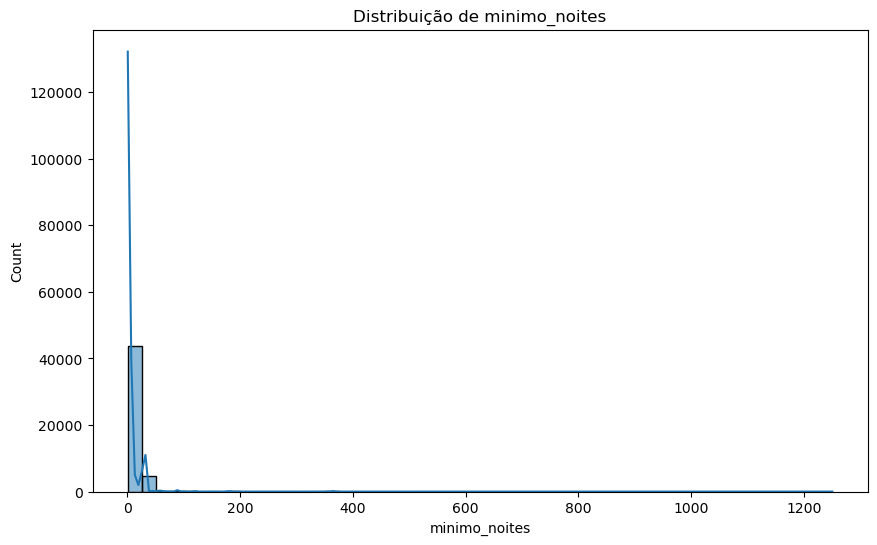

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


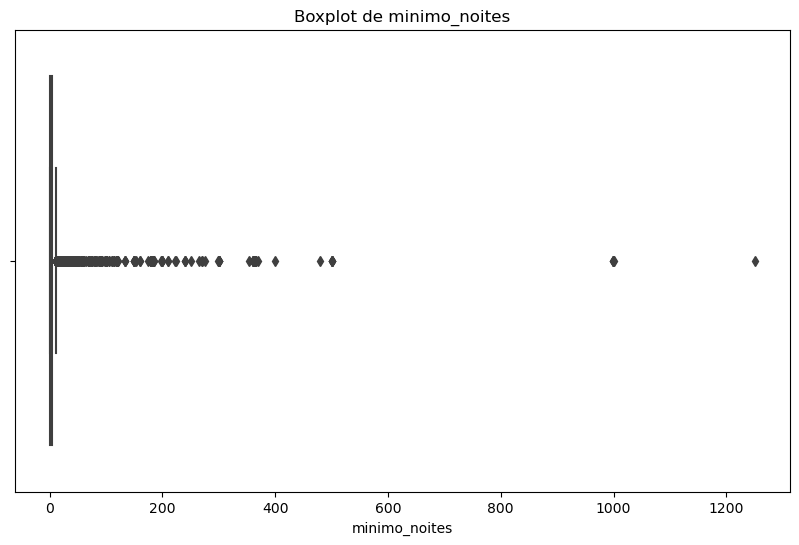

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


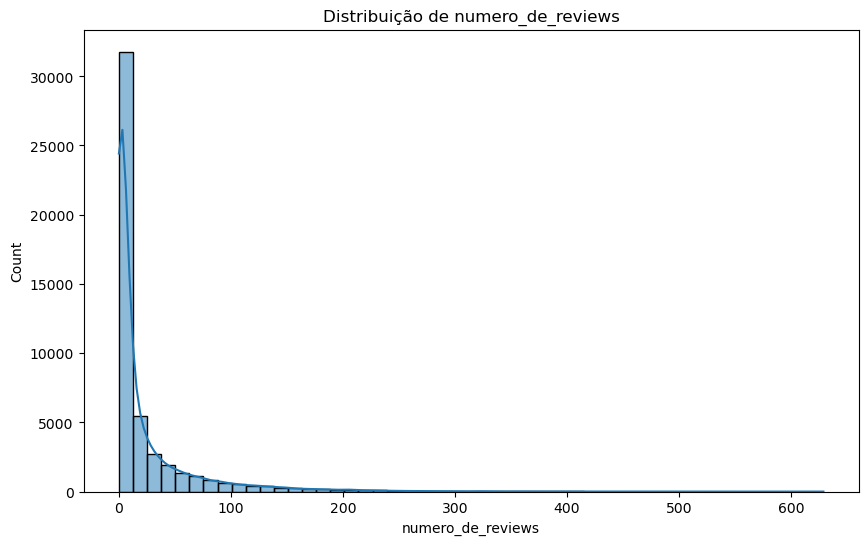

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


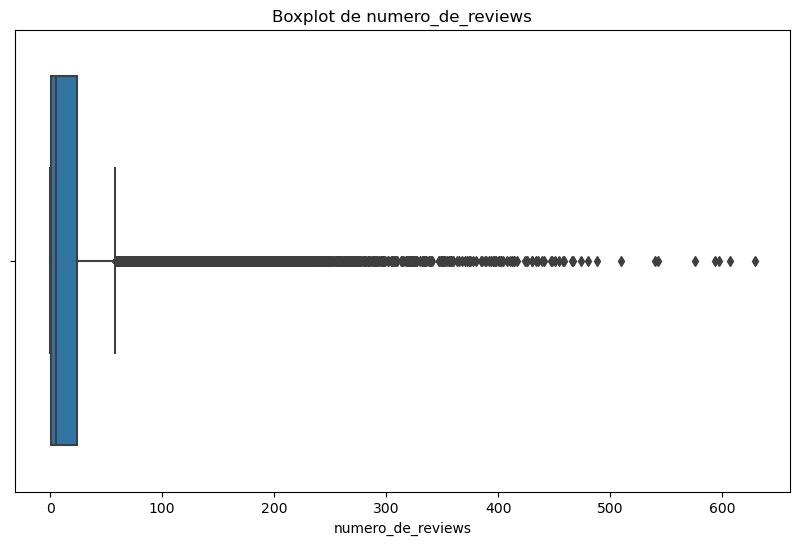

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


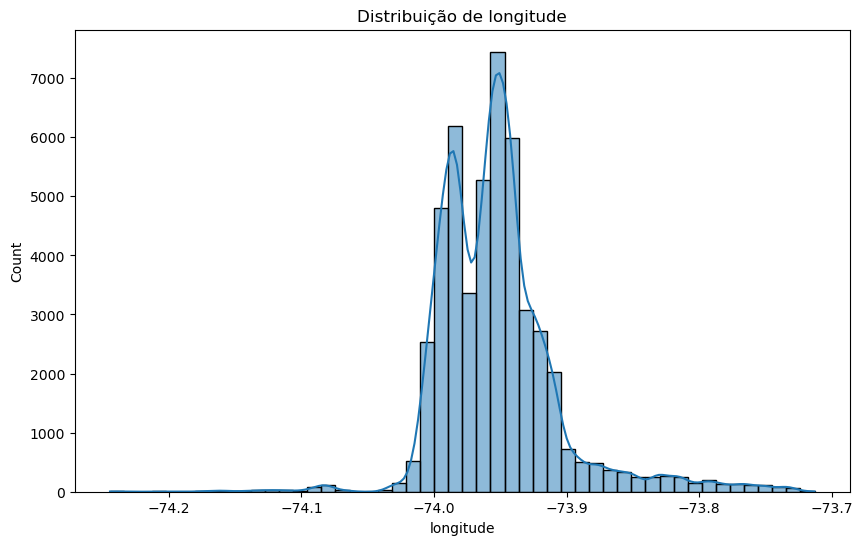

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


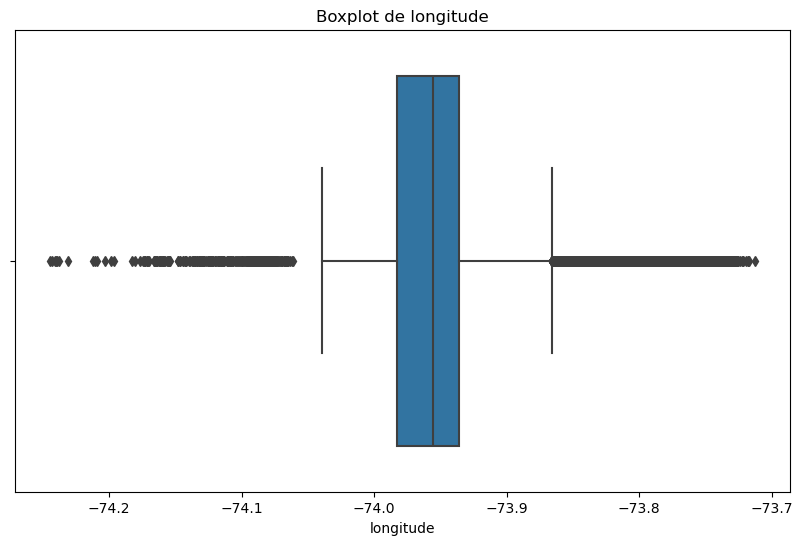

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


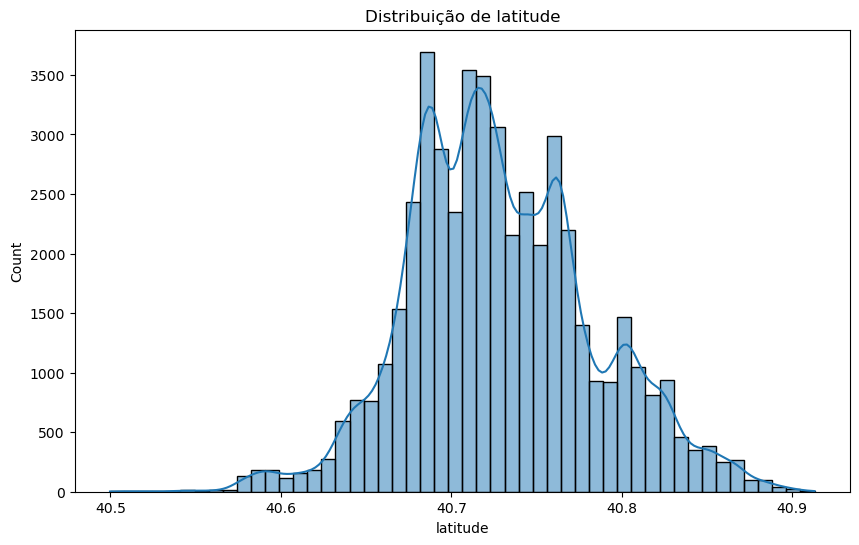

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


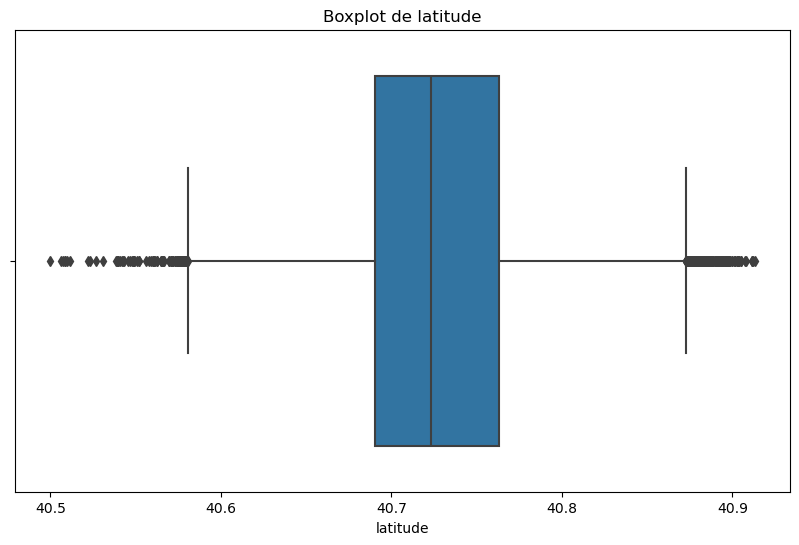

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


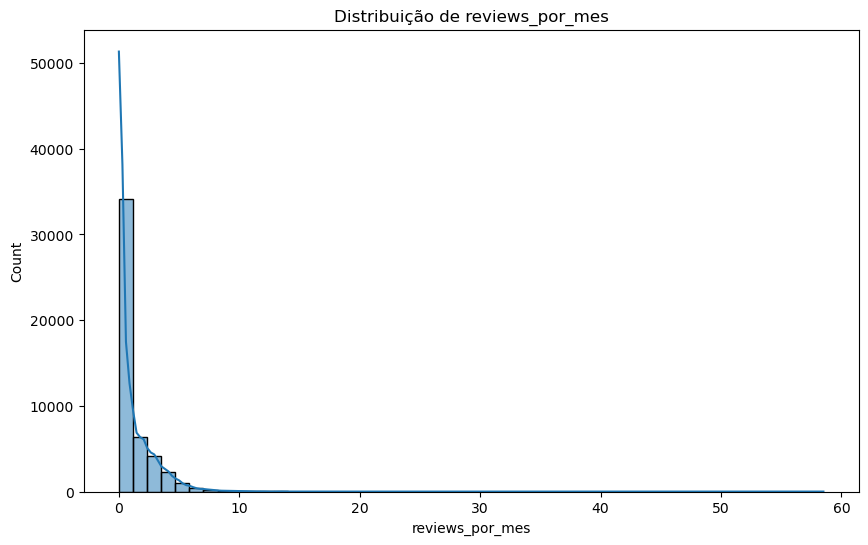

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


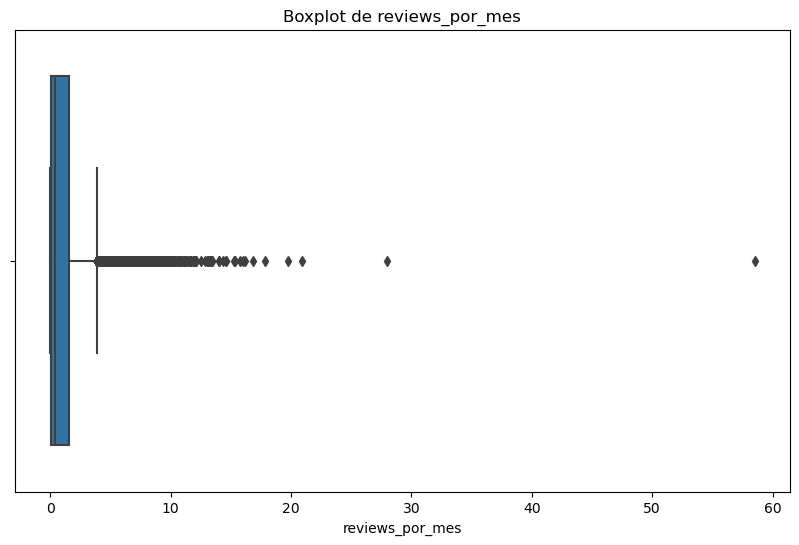

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


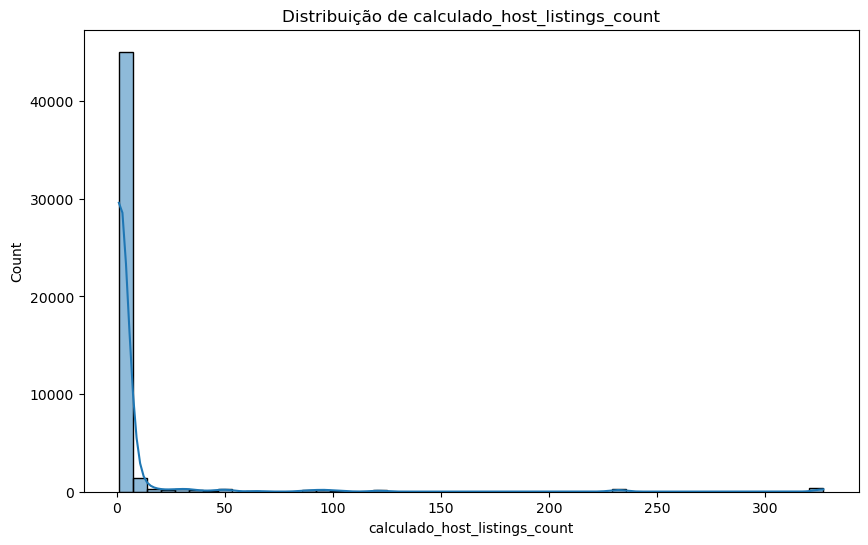

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


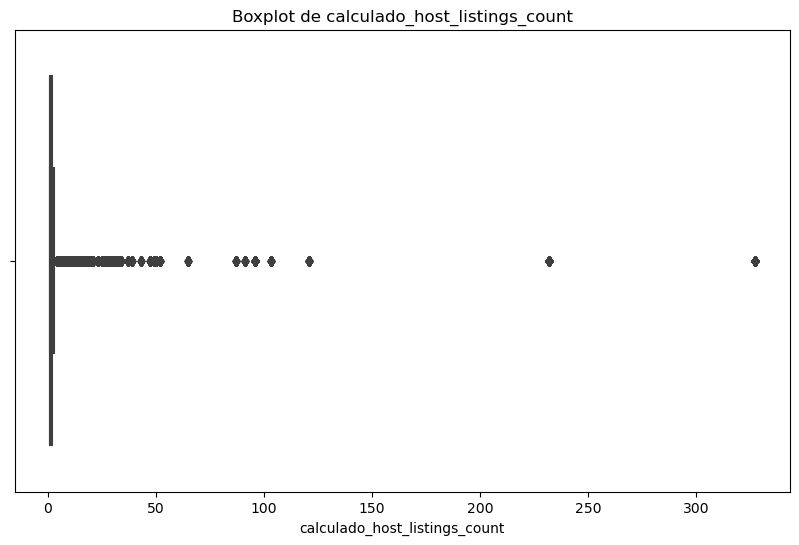

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


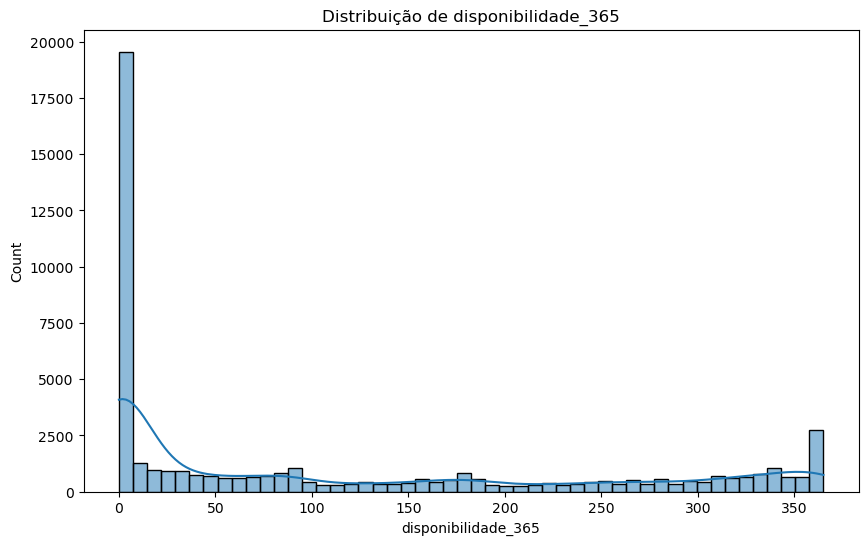

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


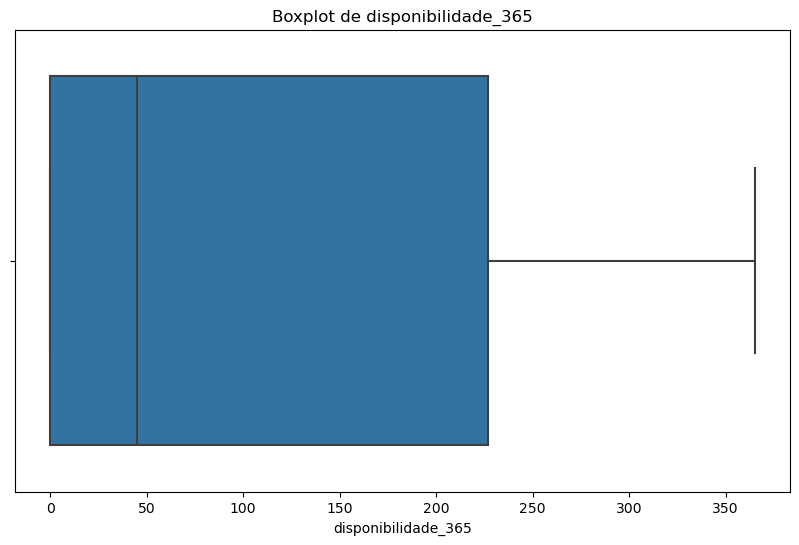

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df_aux = {
    'price': data['price'],
    'minimo_noites': data['minimo_noites'],
    'numero_de_reviews': data['numero_de_reviews'],
    'longitude': data['longitude'],
    'latitude': data['latitude'],
    'reviews_por_mes': data['reviews_por_mes'],
    'calculado_host_listings_count': data['calculado_host_listings_count'],
    'disponibilidade_365': data['disponibilidade_365']
}

for key, value in df_aux.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(value, kde=True, bins=50)
    plt.title(f'Distribuição de {key}')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=value)
    plt.title(f'Boxplot de {key}')
    plt.show()

#### Normalizações aplicadas aos Dados Númericos

Para lidar com os outliers nas variáveis `price`, `minimo_noites`, `calculado_host_listings_count`, `reviews_por_mes` e `numero_de_reviews`, foi usada uma transformação logarítmica. Essa abordagem ajuda a comprimir os valores grandes e estabilizar a variância, tornando a distribuição mais simétrica. Para as variáveis `longitude` e `latitude`, aplicamos a normalização Z-score, que subtrai a média e divide pelo desvio padrão. Isso garante que essas variáveis tenham média zero e desvio padrão igual a um, facilitando a modelagem posterior. E por fim, a `disponibilidade_365` não apresentou desbalanceamentos e outliers em seus dados e por isso foi apenas normalizada para que o modelo conseguisse desenvolver uma comparação mais adequada entre ela e as demais features, sendo essa normalização com o min-score. Essas decisões foram tomadas para minimizar o impacto dos outliers e melhorar a performance dos modelos preditivos.

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

columns_to_transform = ['price', 'numero_de_reviews', 'latitude', 'longitude', 'minimo_noites', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']
columns_preserved = [col for col in data.columns if col not in columns_to_transform]

log_transformer = FunctionTransformer(np.log1p, validate=False)

pipeline_norm_num_var = Pipeline(steps=[
    ('transformer', ColumnTransformer(
        transformers=[
            ('log_transform', log_transformer, ['price', 'numero_de_reviews', 'minimo_noites', 'reviews_por_mes', 'calculado_host_listings_count']),
            ('min_max_scaler', MinMaxScaler(), ['disponibilidade_365']),
            ('scaler', StandardScaler(), ['latitude', 'longitude'])
        ]))
])

data_transformed = pipeline_norm_num_var.fit_transform(data)
data_transformed = pd.DataFrame(data_transformed, columns=columns_to_transform)


data_preserved = data[columns_preserved]
data = pd.concat([data_preserved, data_transformed], axis=1)
data.head()

,id,host_id,bairro_group,bairro,room_type,ultima_review,price,numero_de_reviews,latitude,longitude,minimo_noites,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,2845,Manhattan,Midtown,Entire home/apt,2019-05-21,5.420535,3.828641,0.693147,0.322083,1.098612,0.972603,0.452411,-0.684642
1,3647,4632,Manhattan,Harlem,Private room,2011-01-01,5.017280,0.000000,1.386294,0.000000,0.693147,1.000000,1.468387,0.222486
2,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05,4.499810,5.602119,0.693147,1.729884,0.693147,0.531507,-0.803438,-0.164457
3,5022,7192,Manhattan,East Harlem,Entire home/apt,2018-11-19,4.394449,2.302585,2.397895,0.095310,0.693147,0.000000,1.275645,0.177205
4,5099,7322,Manhattan,Murray Hill,Entire home/apt,2019-06-22,5.303305,4.317488,1.386294,0.463734,0.693147,0.353425,0.343295,-0.494637


#### Distribução dos dados categóricos

As features categoricas no dataseta, são: `bairro_group`, `bairro` e `room_type`.Esses dados também possuem difetentes formas de serem padronizados e para determinar a melhor abordagem é necessário visualizar sua distribuição atual:

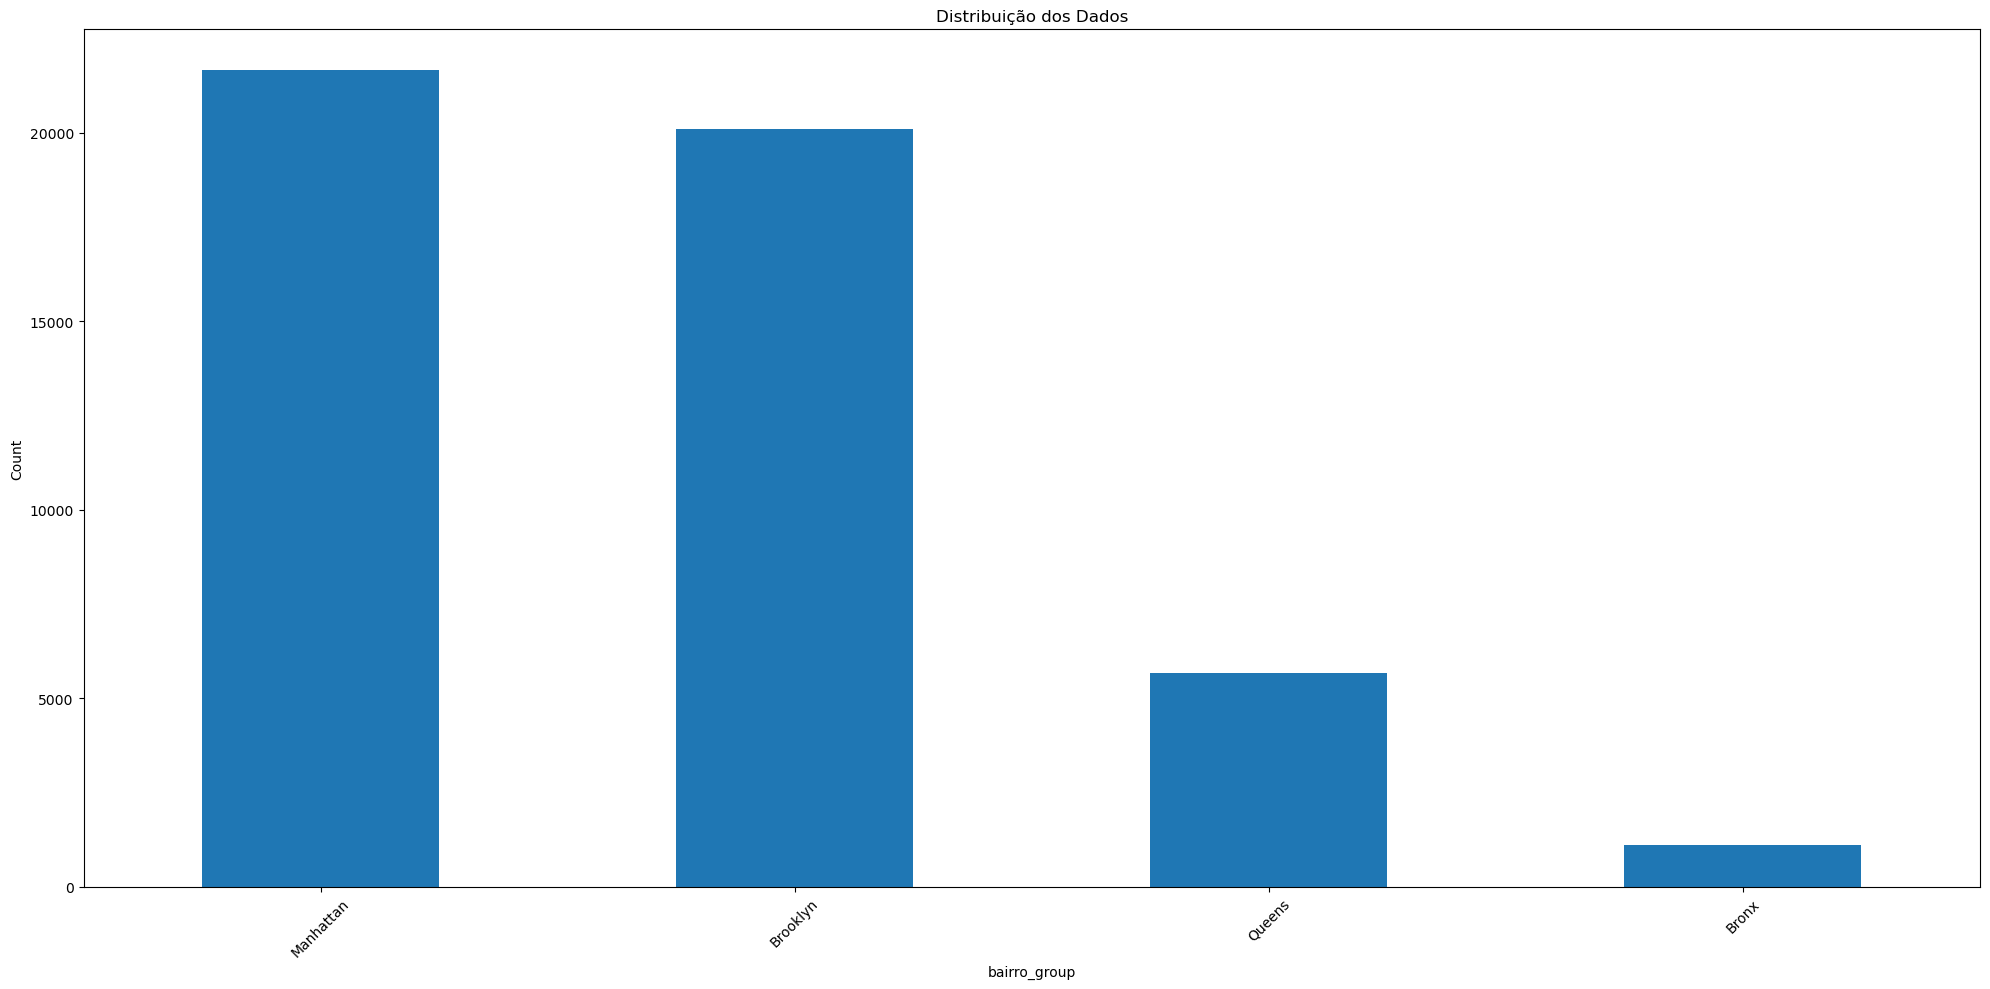

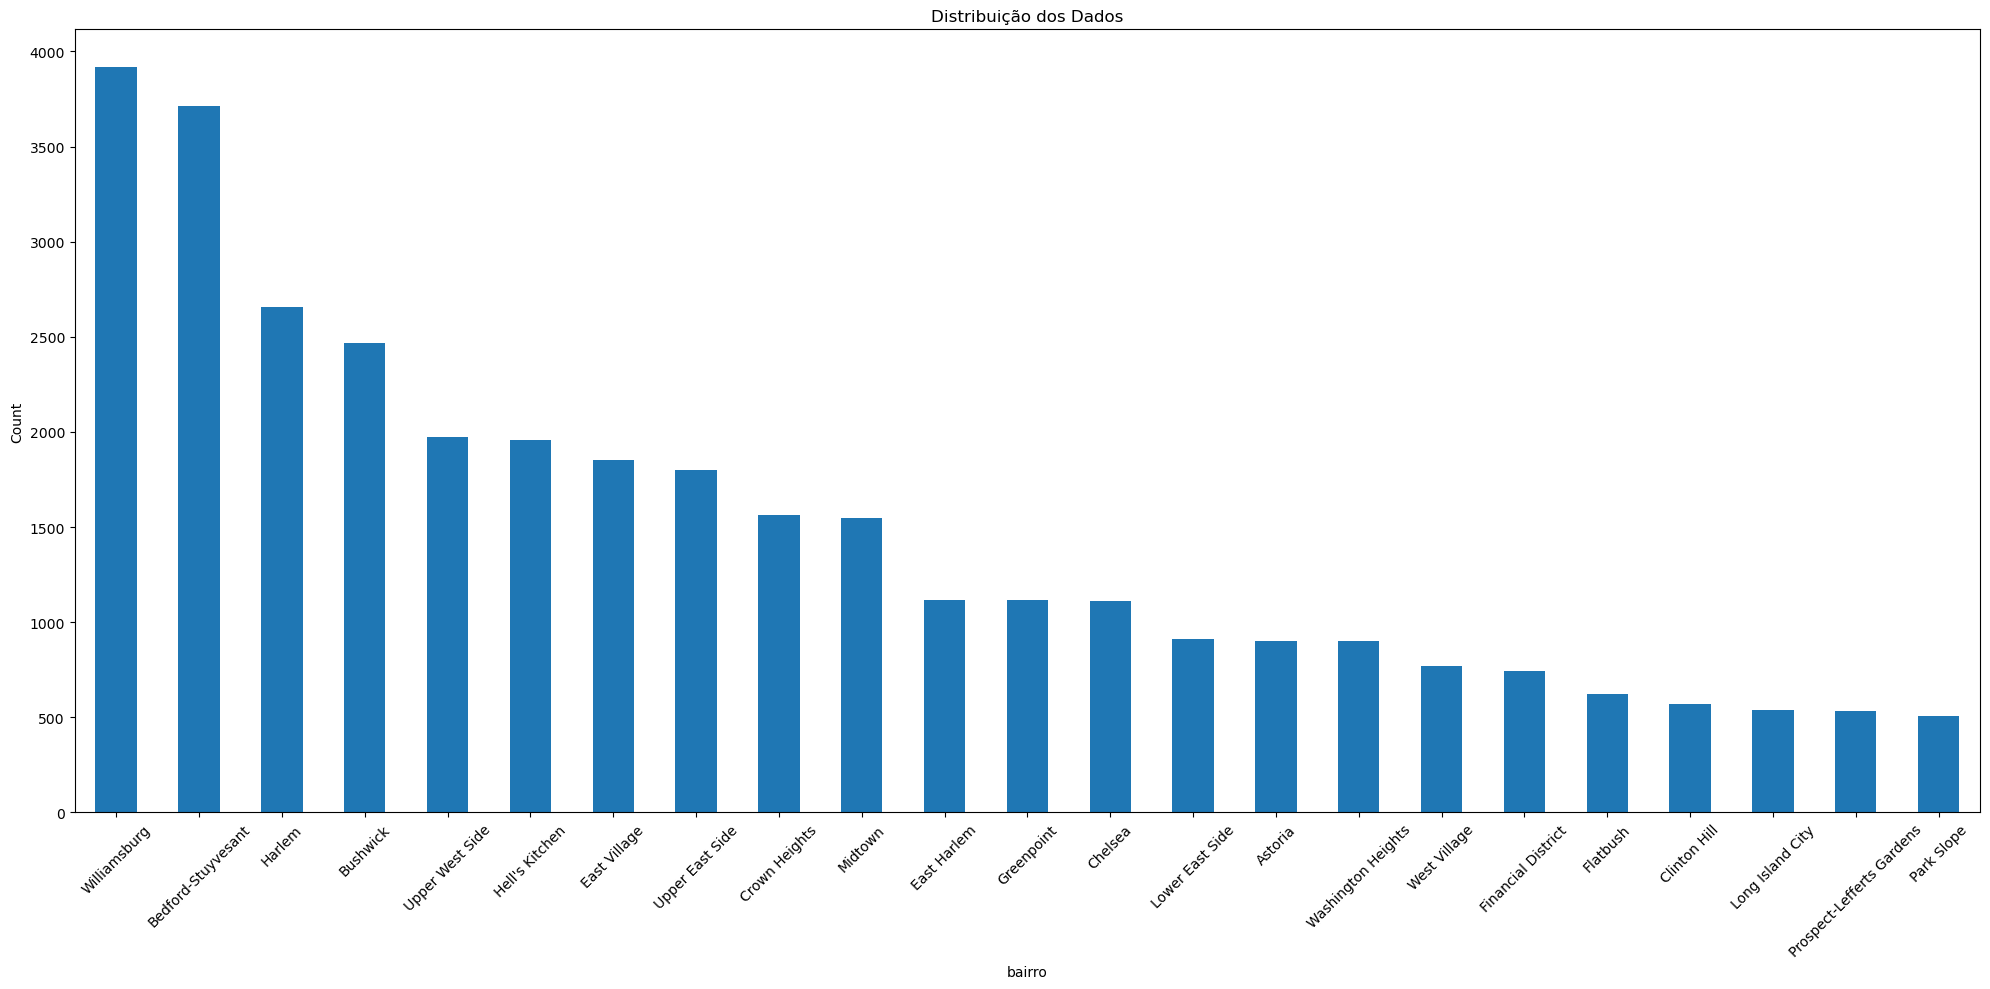

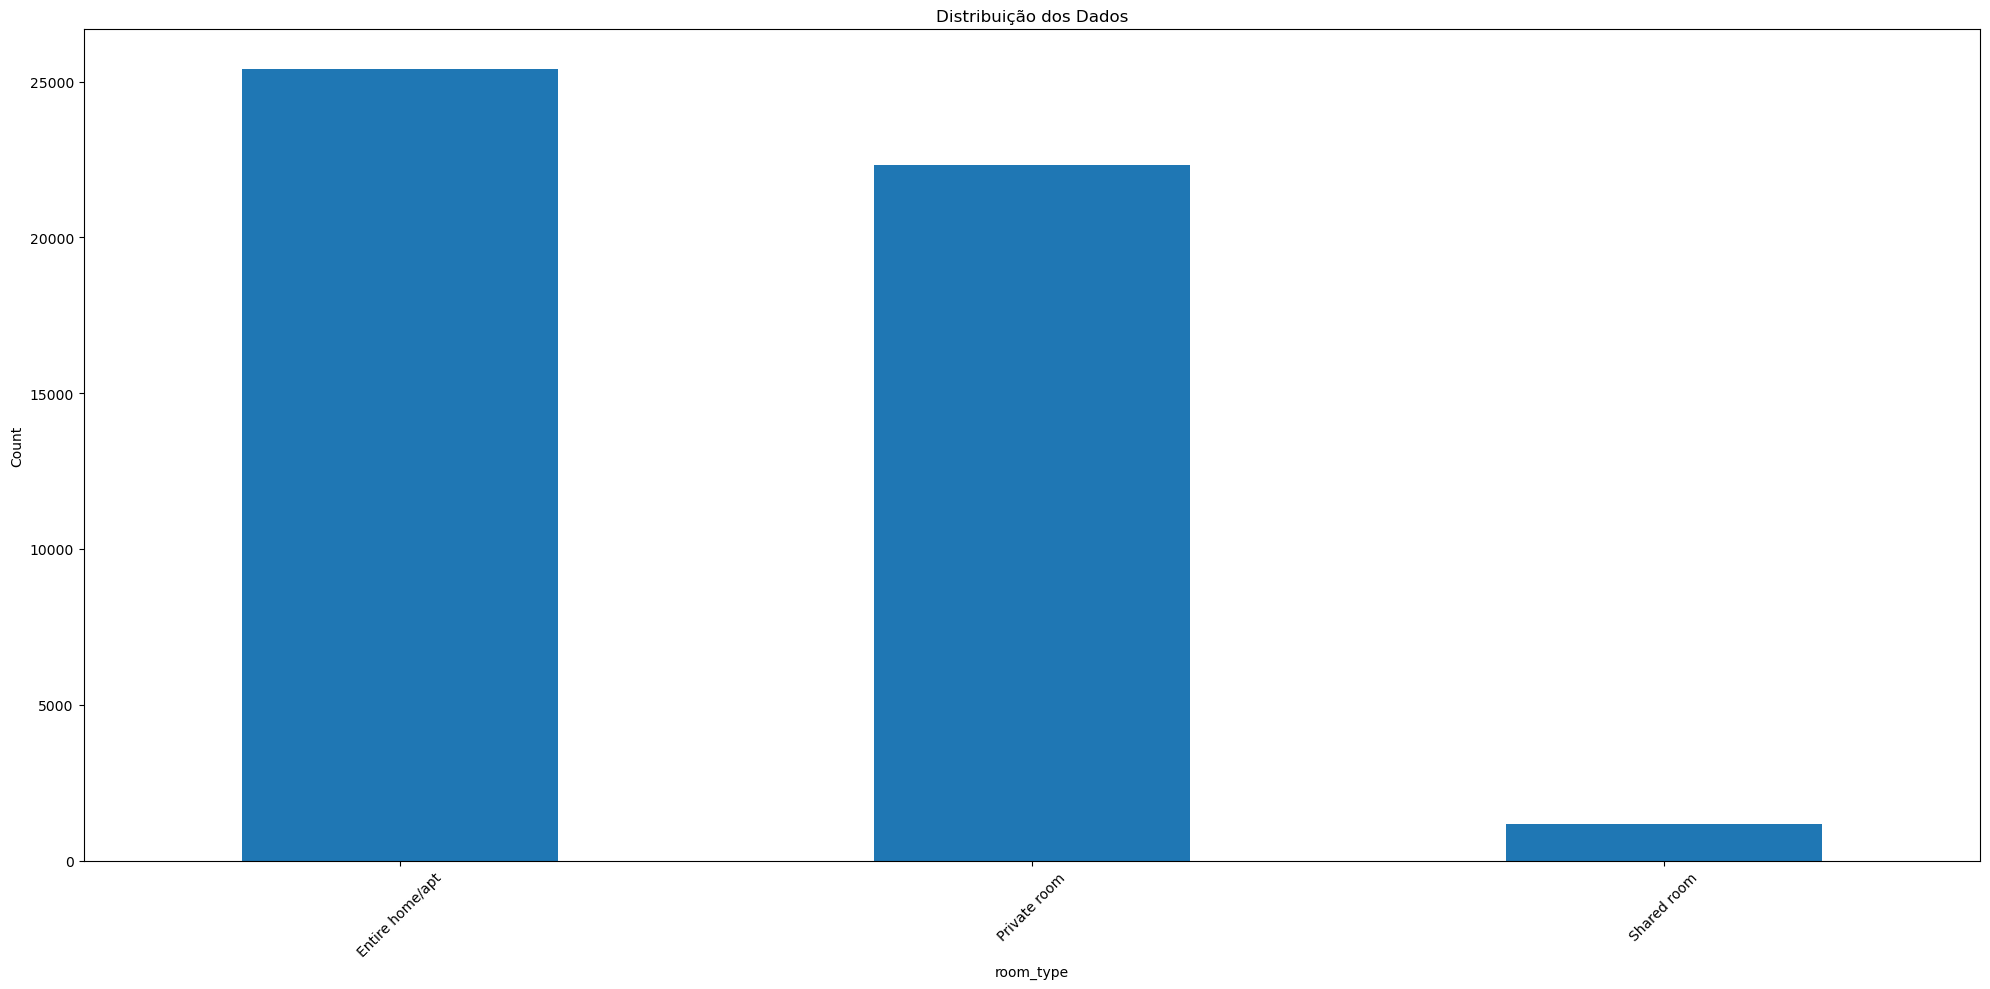

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_analyze = ['bairro_group', 'bairro', 'room_type']

for column in columns_to_analyze:
    x = data[column]
    unique_counts = x.value_counts()
    unique_counts = unique_counts[unique_counts > 500]

    plt.figure(figsize=(20, 10))
    unique_counts.plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Distribuição dos Dados')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Foi utilizado um filtro com número minimo de dados da label apenas para melhor visualização da feature de bairros, isso não afetou as demais features analizadas.

#### Padronizações aplicadas aos dados categóricos

Com as distribuições apresentadas é possível verificar que as features: `bairro_group`e `room_type` possuem poucas labels em seus dados e aplicar uma transformação label a label nelas não vai alterar a percepção das demais features. Já a feature: `bairro` possui diversos dados e por isso a melhor abordagem para ela é a one-hot qu transforma cada label em uma feature binária, trata-se de um tradeoff que aumenta a dimencionalidade dos dados a medida que não altera a percepção das demais feaures sobre ela.

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
encoder_oh = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

def encode_categorical_features(data, column, encoder, is_one_hot=False):    
    if is_one_hot:
        encoded_array = encoder.fit_transform(data[[column]])
        encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([column]))
        data = pd.concat([data, encoded_df], axis=1).drop(columns=[column])
    else:
        data[column] = label_encoder.fit_transform(data[column])
    return data

data = encode_categorical_features(data, 'bairro_group', label_encoder, is_one_hot=False)
data = encode_categorical_features(data, 'bairro', encoder_oh, is_one_hot=True)
data = encode_categorical_features(data, 'room_type', label_encoder, is_one_hot=False)

data.head()


,id,host_id,bairro_group,room_type,ultima_review,price,numero_de_reviews,latitude,longitude,minimo_noites,...,bairro_Westerleigh,bairro_Whitestone,bairro_Williamsbridge,bairro_Williamsburg,bairro_Willowbrook,bairro_Windsor Terrace,bairro_Woodhaven,bairro_Woodlawn,bairro_Woodrow,bairro_Woodside
0,2595,2845,2,0,2019-05-21,5.420535,3.828641,0.693147,0.322083,1.098612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3647,4632,2,1,2011-01-01,5.017280,0.000000,1.386294,0.000000,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3831,4869,1,0,2019-07-05,4.499810,5.602119,0.693147,1.729884,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5022,7192,2,0,2018-11-19,4.394449,2.302585,2.397895,0.095310,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5099,7322,2,0,2019-06-22,5.303305,4.317488,1.386294,0.463734,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Distribuição dos e Padronização dos Dados Identificadores e Temporais

Dados identificadores, como: `host_id` e dados temporais como: `ultima_review` podem ser muito úteis para as análises da feature price e com o objetivo de utiliza-los futuramente também foi realizada uma verificação de sua distribuição antes de apresentar a melhor forma de padronizá-los.



In [25]:
data['host_id'] = data['host_id'].astype('category').cat.codes
data['id'] = data['id'].astype('category').cat.codes
data.head()

,id,host_id,bairro_group,room_type,ultima_review,price,numero_de_reviews,latitude,longitude,minimo_noites,...,bairro_Westerleigh,bairro_Whitestone,bairro_Williamsbridge,bairro_Williamsburg,bairro_Willowbrook,bairro_Windsor Terrace,bairro_Woodhaven,bairro_Woodlawn,bairro_Woodrow,bairro_Woodside
0,0,3,2,0,2019-05-21,5.420535,3.828641,0.693147,0.322083,1.098612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,13,2,1,2011-01-01,5.017280,0.000000,1.386294,0.000000,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,14,1,0,2019-07-05,4.499810,5.602119,0.693147,1.729884,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,18,2,0,2018-11-19,4.394449,2.302585,2.397895,0.095310,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,21,2,0,2019-06-22,5.303305,4.317488,1.386294,0.463734,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


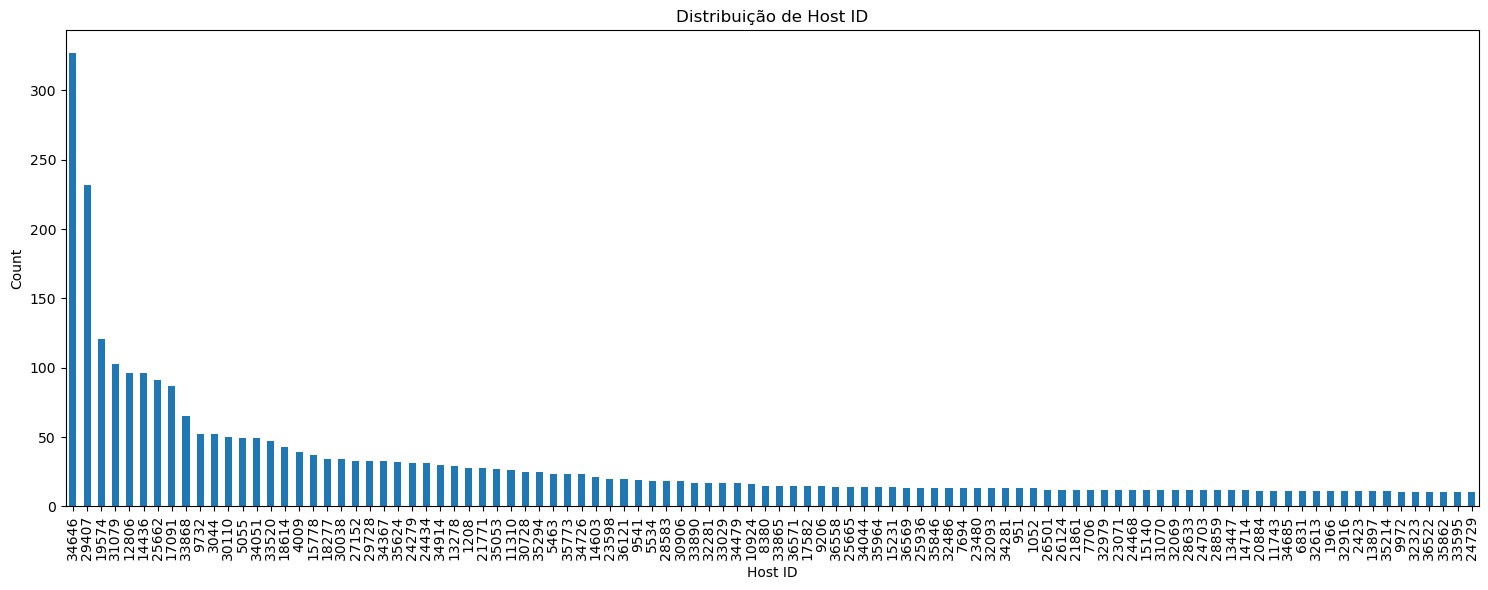

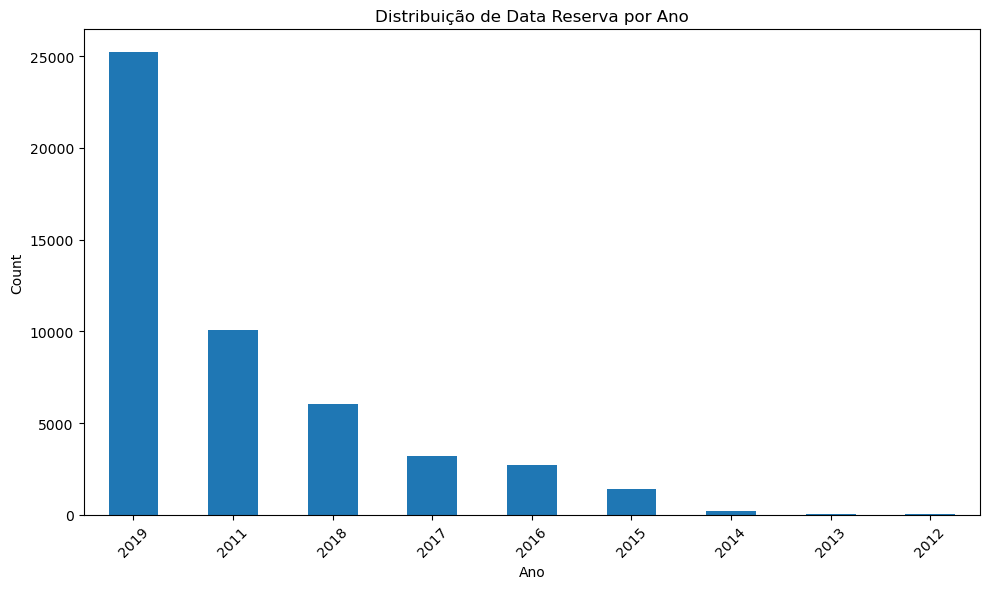

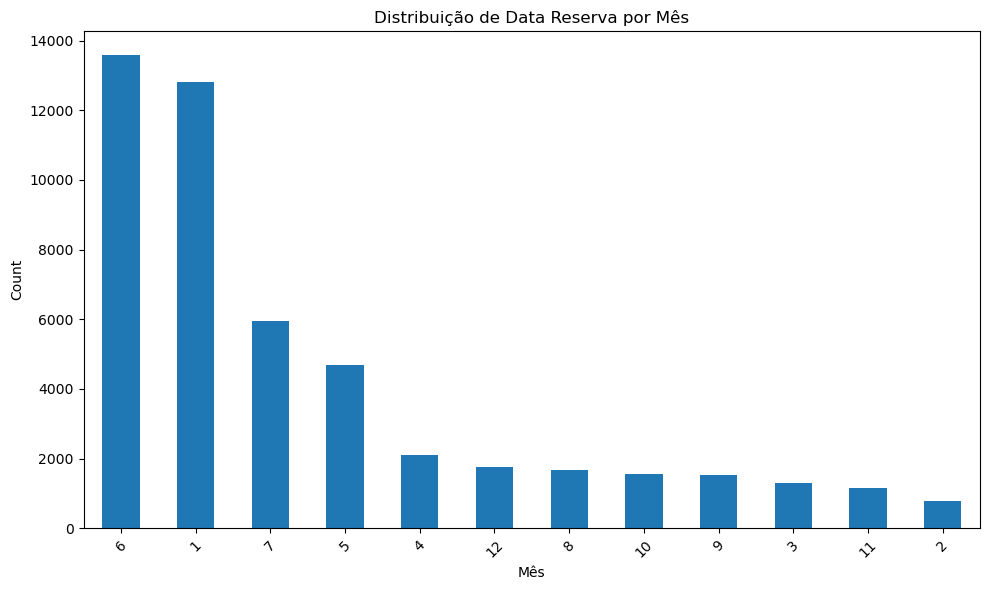

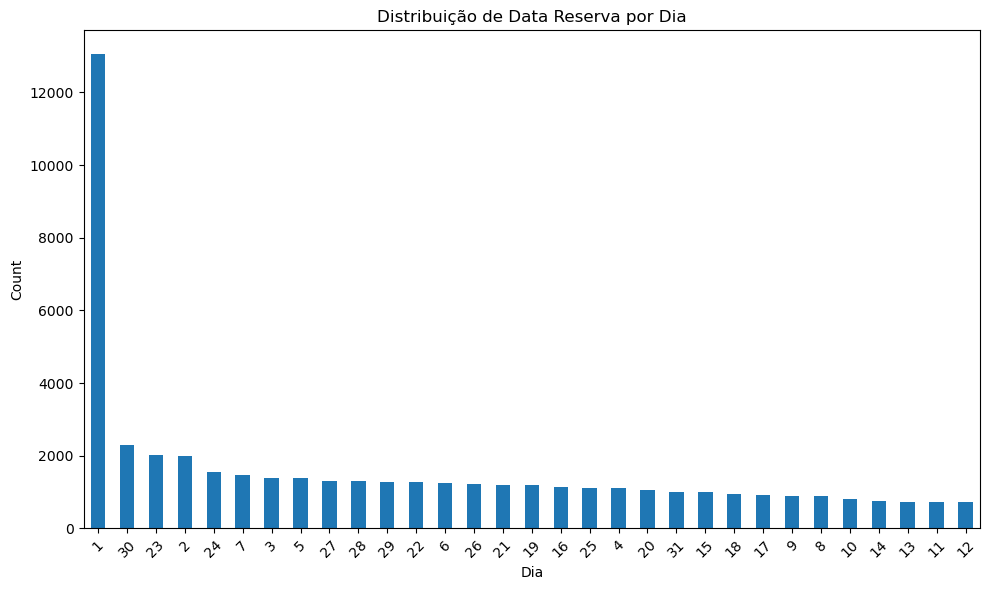

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
data['host_id'].value_counts().head(100).plot(kind='bar')
plt.xlabel('Host ID')
plt.ylabel('Count')
plt.title('Distribuição de Host ID')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

data_ = data.copy()
data_['ano'] = data_['ultima_review'].dt.year
data_['mes'] = data_['ultima_review'].dt.month
data_['dia'] = data_['ultima_review'].dt.day

plt.figure(figsize=(10, 6))
data_['ano'].value_counts().plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Count')
plt.title('Distribuição de Data Reserva por Ano')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
data_['mes'].value_counts().plot(kind='bar')
plt.xlabel('Mês')
plt.ylabel('Count')
plt.title('Distribuição de Data Reserva por Mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
data_['dia'].value_counts().plot(kind='bar')
plt.xlabel('Dia')
plt.ylabel('Count')
plt.title('Distribuição de Data Reserva por Dia')
plt.xticks(rotation=45)
plt.tight_layout()

Olhando a distribuição das features criadas a partir de `ultima_review`, a distribução é uniforme com alguns picos de review em 2019, provavelmente pelo contexto social e discipação do acesso a internet, mas ao analizar a correlação das features avaliadas com a feature objetivo `price` é possível perceber que sua correlação é pequena o que pode atrapalhar o desempenho dos algoritmos de regressão que serão utilizados futuramente e por isso ela será removida do dataset.

In [27]:
correlation = data_[['ano', 'mes', 'dia', 'ultima_review', 'price']].corr(method='spearman')
print("Correlação entre 'ano', 'mes', 'dia' e 'price':")
print(correlation)

data = data.drop('ultima_review', axis=1)
del data_

Correlação entre 'ano', 'mes', 'dia' e 'price':
                    ano       mes       dia  ultima_review     price
ano            1.000000  0.344309  0.481869       0.927048 -0.044937
mes            0.344309  1.000000  0.430512       0.493251 -0.033789
dia            0.481869  0.430512  1.000000       0.441452 -0.049454
ultima_review  0.927048  0.493251  0.441452       1.000000 -0.035283
price         -0.044937 -0.033789 -0.049454      -0.035283  1.000000


O mesmo ocorre para a variável `host_id`, ela possui 37.457 valores únicos dos quais 100 são apesentados no gráfico apenas para fins amostrais. A correlação muito baixa com `price` sugere que `host_id` não contribui significativamente para a previsão do preço. Mantê-la pode adicionar ruído ao modelo e aumentar a complexidade sem benefícios substânciais.

In [28]:
correlation = data[['host_id', 'price']].corr(method='spearman')
print("Correlação entre 'host_id' e 'price':")
print(correlation)
data = data.drop('host_id', axis=1)

Correlação entre 'host_id' e 'price':
          host_id     price
host_id  1.000000 -0.071757
price   -0.071757  1.000000


# Análise Exploratória

### Análise descritiva


Os dados apresentados a seguir indicam que:  os preços estão relativamente concentrados em torno da média, mostrando uma ampla faixa de preços. Também indicam alta variabilidade no número de reviews. As variáveis 'longitude' e 'latitude' têm médias de 1.50 e 0.54, respectivamente, com desvios padrão de 0.87 e 0.58, sugerindo uma distribuição geográfica concentrada, como já vimos nos graficos de distribuição por cidade dos dados. A variável 'minimo_noites' indica em seus dados estatísticos que a maioria das acomodações exige um mínimo de noites semelhante. A distribuição de 'reviews_por_mes' sugere o que a frequência de reviews mensais varia bastante entre as acomodações. Por fim, as variáveis 'calculado_host_listings_count' e 'disponibilidade_365' tem uma média próxima de zero e um desvio padrão de 1.00, indicando alta variabilidade na contagem de listagens por host e na disponibilidade das acomodações ao longo do ano, respectivamente.

In [29]:
from tabulate import tabulate

numerical_vars = ['price', 'numero_de_reviews', 'longitude', 'latitude', 'minimo_noites', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']
numerical_summary = (data[numerical_vars].describe().transpose()).drop('count', axis=1)

print(tabulate(numerical_summary, headers='keys', tablefmt='grid'))

+-------------------------------+--------------+----------+-----------+------------+------------+----------+---------+
|                               |         mean |      std |       min |        25% |        50% |      75% |     max |
+===============================+==============+==========+===========+============+============+==========+=========+
| price                         |  4.73688     | 0.69535  |  0        |  4.2485    |  4.67283   | 5.17048  | 9.21044 |
+-------------------------------+--------------+----------+-----------+------------+------------+----------+---------+
| numero_de_reviews             |  1.99077     | 1.5642   |  0        |  0.693147  |  1.79176   | 3.21888  | 6.44572 |
+-------------------------------+--------------+----------+-----------+------------+------------+----------+---------+
| longitude                     |  0.542648    | 0.577773 |  0        |  0.0392207 |  0.314811  | 0.947789 | 4.08598 |
+-------------------------------+--------------+

A maioria das acomodações está concentrada em duas classificações específicas de room_type, representando juntas mais de 97% do total. Isso indica que esses tipos de quartos são os mais comuns e possivelmente os mais procurados pelos hóspedes o que pode aumentar seu preço, essa informação é relevante para os algoritmos de regressão que serão aplicados posteriormente e a teoria levantada pode ser confirmada verificando a sua correlação como é realizado a seguir.

Os dados também estão majoritáriamente distribuídos em 2 bairros, com mais de 85% do total, o que indicam que são os bairros mais lucrativos para esse tipo de investimento imobiliário o que geralmente sigifica maiores preços nas acomodações.

In [30]:
import pandas as pd
from tabulate import tabulate

categorical_vars = ['room_type', 'bairro_group']
categorical_summary = data[categorical_vars].apply(pd.Series.value_counts).transpose()

print(tabulate(categorical_summary, headers='keys', tablefmt='grid'))

+--------------+-------+-------+-------+------+-----+
|              |     0 |     1 |     2 |    3 |   4 |
+==============+=======+=======+=======+======+=====+
| room_type    | 25409 | 22325 |  1160 |  nan | nan |
+--------------+-------+-------+-------+------+-----+
| bairro_group |  1091 | 20103 | 21661 | 5666 | 373 |
+--------------+-------+-------+-------+------+-----+


### Visualização dos Dados

A analise geográfica dos dados distribuídos por latitude e longitude indica  existe uma concentração massiva de acomodações em uma certa faixa de longitude e latitude, já abordada anteriormente pelos dados de distribuição por cidade, porém uma nova informação é adicionada no gráfico a seguir, é que a esses dados são em sua maioria de baixo custo. Ainda, quando verifica-se exclusivamente a zona com maior volume das acomodações, também é possivel verificar que é onde se encontram todos os pontos dos clusters de maior preço, ou seja, essas cidades possuem grande investimento imobiliário de baixo e alto padrão mas tem algo que os diferencia, a localização influencia no preço mas exite outro(s) fator que determina qual acomodação consegue ter valor mais elevado ou não.

In [ ]:
! pip install geopandas
! pip install contextily

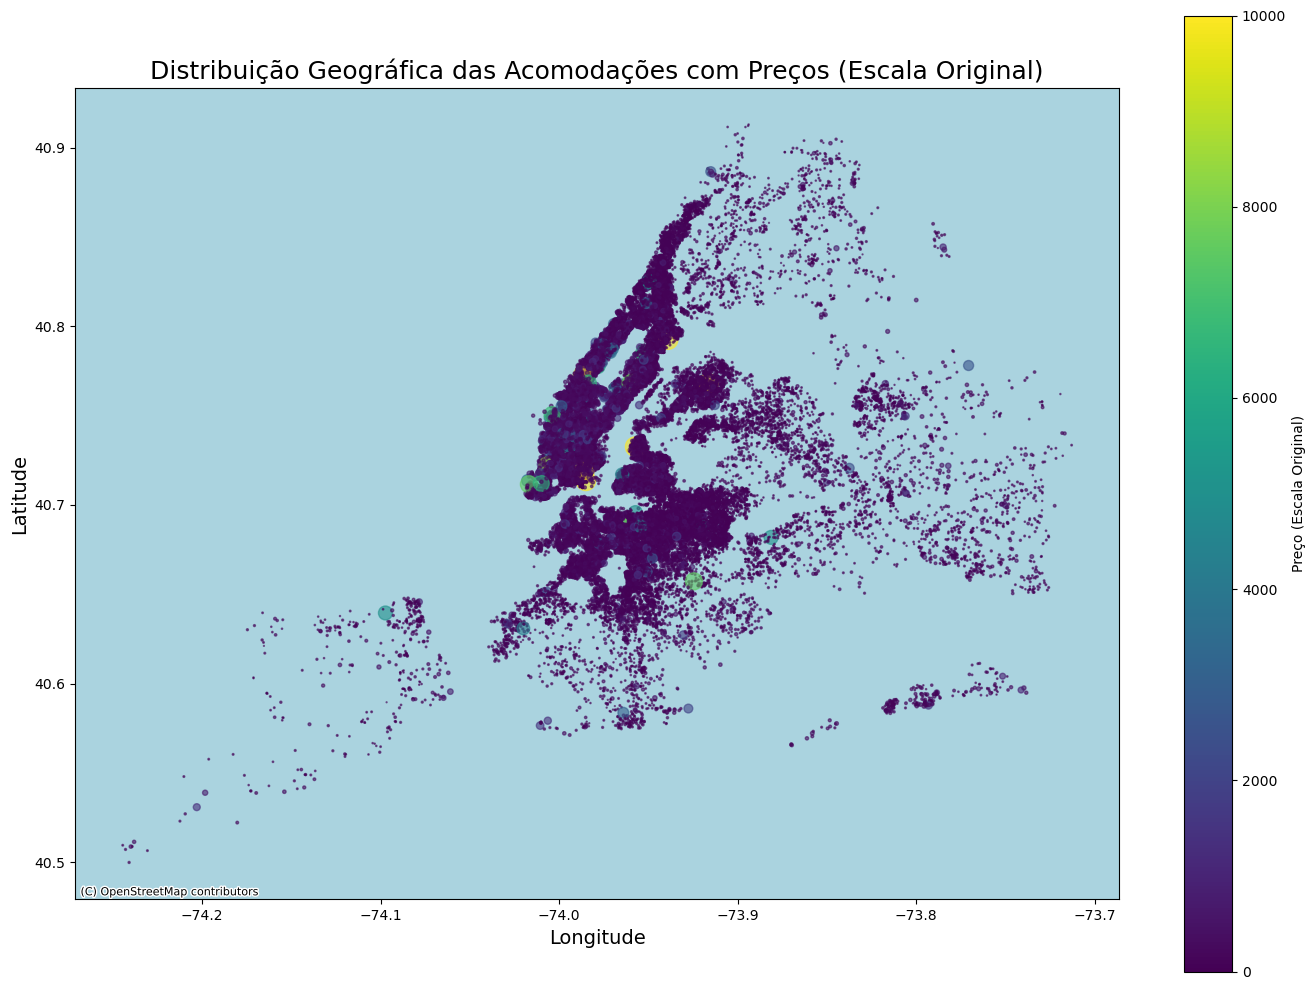

In [28]:
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point


geo_data = data_original[['latitude', 'longitude', 'price']].copy()
gdf_original = gpd.GeoDataFrame(
    geo_data,
    geometry=[Point(xy) for xy in zip(geo_data['longitude'], geo_data['latitude'])],
    crs="EPSG:3857"
)

fig, ax = plt.subplots(figsize=(14, 10))
gdf_original.plot(
    ax=ax,
    markersize=geo_data['price'] / 50,
    color=plt.cm.viridis(geo_data['price'] / geo_data['price'].max()),
    alpha=0.6,
    legend=True
)

ctx.add_basemap(ax, crs=gdf_original.crs, source=ctx.providers.OpenStreetMap.Mapnik, zoom=14)

ax.set_title('Distribuição Geográfica das Acomodações com Preços (Escala Original)', fontsize=18)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.colorbar(plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=geo_data['price'].min(), vmax=geo_data['price'].max())),ax=ax, label="Preço (Escala Original)", orientation="vertical")
plt.tight_layout()

plt.savefig('geo_data_original.png', bbox_inches='tight', dpi=300)
plt.show()

Os gráficos a seguir mostram alguns impactos das normalizações dos dados, os preços por exemplo não perdeu seus outliers representativos de valor, no entanto é possivel perceber que seus dados estão mais normalizados quando apresentados no gráfico de distribuição.

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


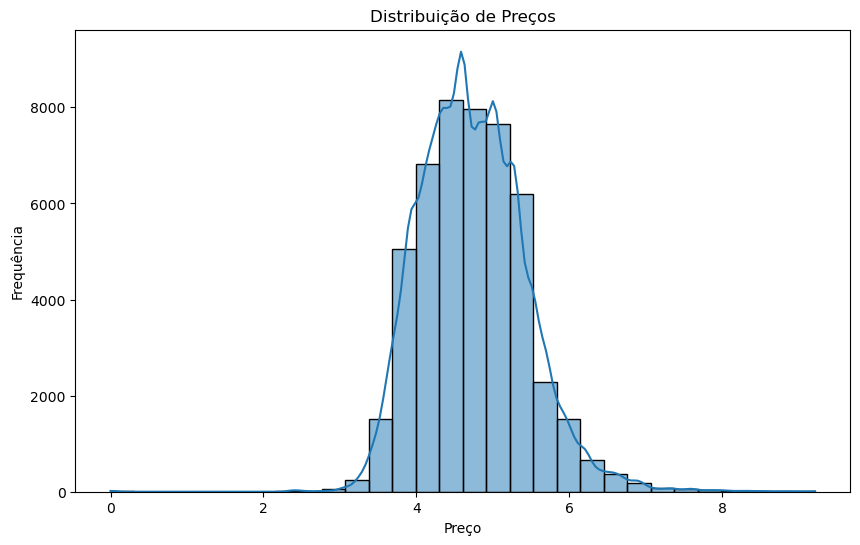

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


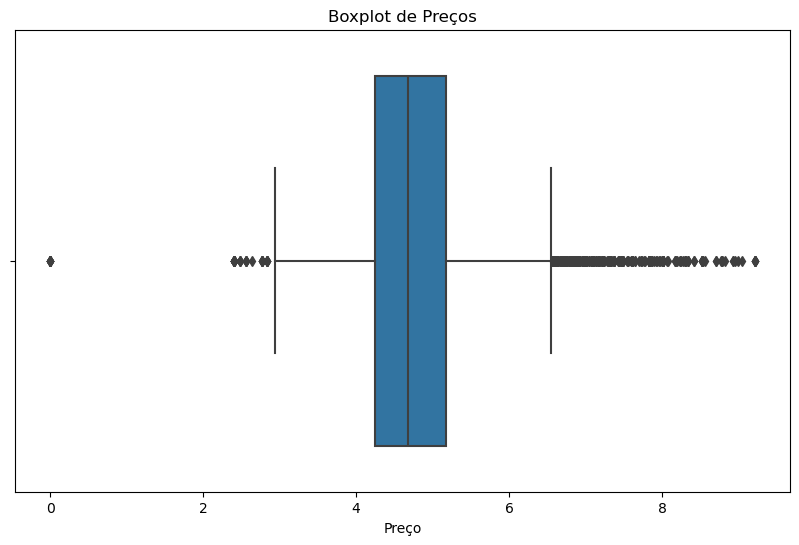

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


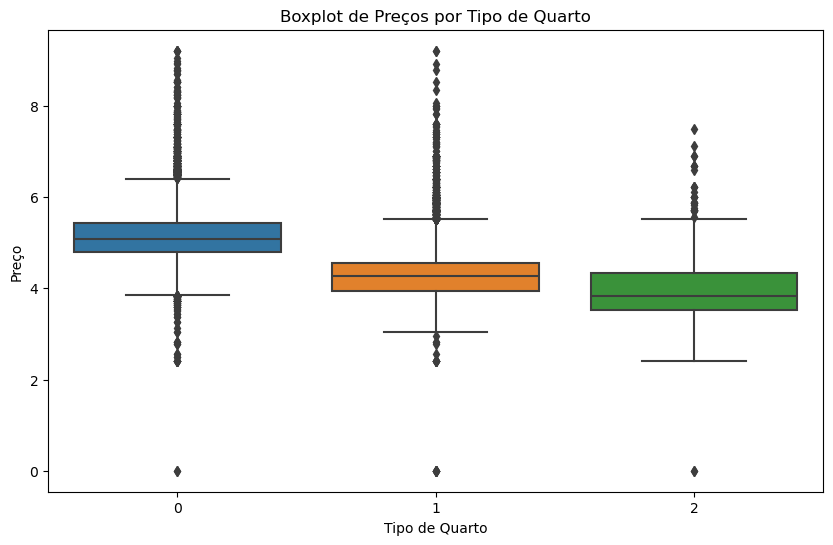

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def criar_visualizacoes(data):
    # Histograma 'price'
    plt.figure(figsize=(10, 6))
    sns.histplot(data['price'], bins=30, kde=True)
    plt.title('Distribuição de Preços')
    plt.xlabel('Preço')
    plt.ylabel('Frequência')
    plt.show()

    # Boxplot 'price'
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='price', data=data)
    plt.title('Boxplot de Preços')
    plt.xlabel('Preço')
    plt.show()

    # Boxplot 'price' por 'room_type'
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='room_type', y='price', data=data)
    plt.title('Boxplot de Preços por Tipo de Quarto')
    plt.xlabel('Tipo de Quarto')
    plt.ylabel('Preço')
    plt.show()

criar_visualizacoes(data)

### Hipóteses de Negócio

Foi testada uma hipotese sobre a influência da longitude e latitude no preço das acomodações com o uso de regressão liear apenas para validar os dados anteriores e a hipotese levantada é verdadeira.

Hipótese 1: A localização (latitude e longitude) influencia significativamente o preço.
Mean Squared Error: 0.4603085092911106
R^2 Score: 0.0047175773034791035


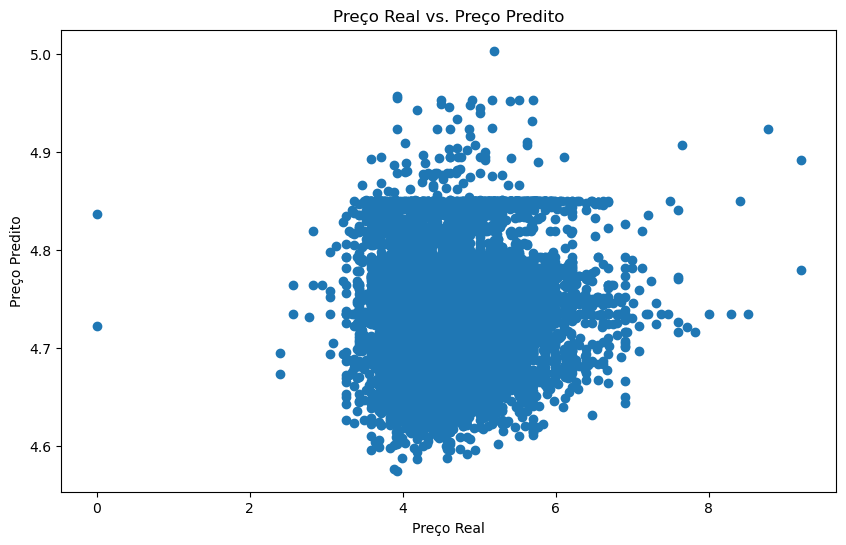

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def testar_hipotese_localizacao(data):
    data_ = data.dropna(subset=['latitude', 'longitude', 'price'])
    X = data_[['latitude', 'longitude']]
    y = data_['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Hipótese 1: A localização (latitude e longitude) influencia significativamente o preço.")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Preço Real')
    plt.ylabel('Preço Predito')
    plt.title('Preço Real vs. Preço Predito')
    plt.show()

testar_hipotese_localizacao(data)

Outro fator que tem impacto no preço da acomodação é o tipo de quarto, teoria testada com regressão linear também e que se mostrou verdadeira

Hipótese 2: O tipo de quarto (room_type) tem um impacto direto no preço.
Mean Squared Error: 0.28741038053377604
R^2 Score: 0.37855917483185697


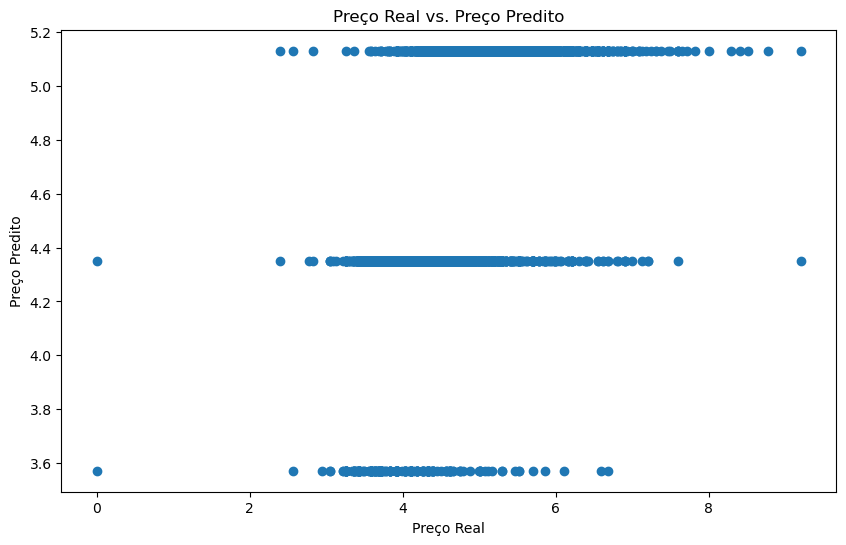

In [31]:
def testar_hipotese_tipo_quarto(data):
    data_ = data.dropna(subset=['room_type', 'price'])
    X = data_[['room_type']]
    y = data_['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Hipótese 2: O tipo de quarto (room_type) tem um impacto direto no preço.")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Preço Real')
    plt.ylabel('Preço Predito')
    plt.title('Preço Real vs. Preço Predito')
    plt.show()

testar_hipotese_tipo_quarto(data)

O minímo de noites, disponibilidade ao longo do ano e número de avaliações no entanto não geraram métricas tão conclusivas sobre suas influências no preço da acomodação, seria necessário a apricação do algoritmo com e sem as features a fim de comprovar ou reprovar sua eficácia na determinação do preço.

Hipótese 3: O número mínimo de noites (minimo_noites) pode afetar o preço.
Mean Squared Error: 0.4610780866226103
R^2 Score: 0.003053591573284997


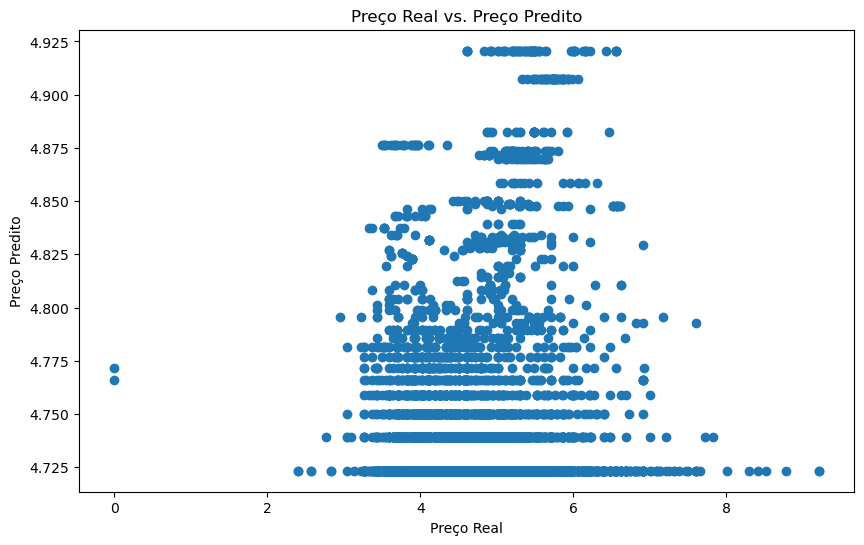

In [32]:
def testar_hipotese_minimo_noites(data, show_plot=True):
    data_ = data.dropna(subset=['minimo_noites', 'price'])
    X = data_[['minimo_noites']]
    y = data_['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Hipótese 3: O número mínimo de noites (minimo_noites) pode afetar o preço.")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    
    if show_plot:
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred)
        plt.xlabel('Preço Real')
        plt.ylabel('Preço Predito')
        plt.title('Preço Real vs. Preço Predito')
        plt.show()

    return y_test, y_pred

_, _ = testar_hipotese_minimo_noites(data)

Hipótese 4: A disponibilidade ao longo do ano (disponibilidade_365) pode estar correlacionada com o preço.
Mean Squared Error: 0.4128061256479213
R^2 Score: 0.10742757836138506


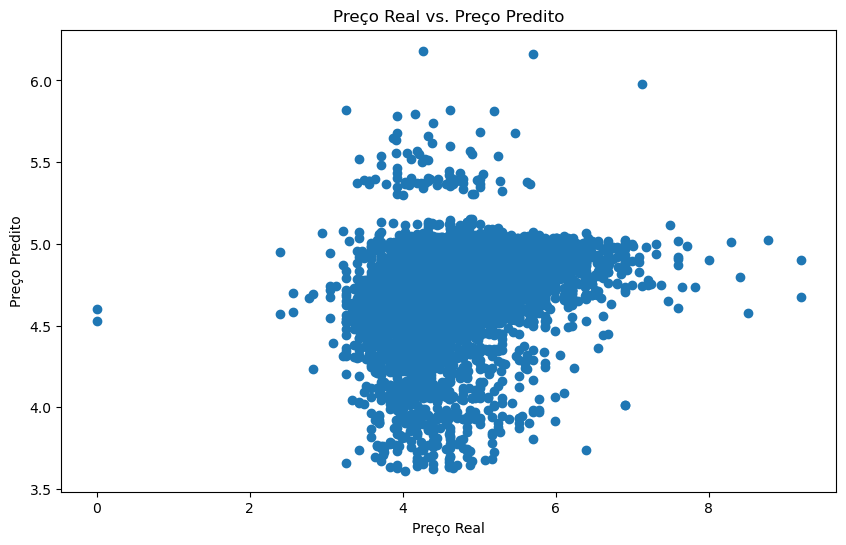

In [33]:
def testar_hipotese_disponibilidade(data, show_plot=True):
    data_ = data.dropna(subset=['disponibilidade_365', 'price'])
    X = data_[['disponibilidade_365']]
    y = data_['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Hipótese 4: A disponibilidade ao longo do ano (disponibilidade_365) pode estar correlacionada com o preço.")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    
    if show_plot:
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred)
        plt.xlabel('Preço Real')
        plt.ylabel('Preço Predito')
        plt.title('Preço Real vs. Preço Predito')
        plt.show()

    return y_test, y_pred

_, _ = testar_hipotese_disponibilidade(data)

Hipótese 5: O número de avaliações (numero_de_reviews) pode influenciar a percepção de valor e, consequentemente, o preço.
Mean Squared Error: 0.4611494899727073
R^2 Score: 0.0028992027278937904


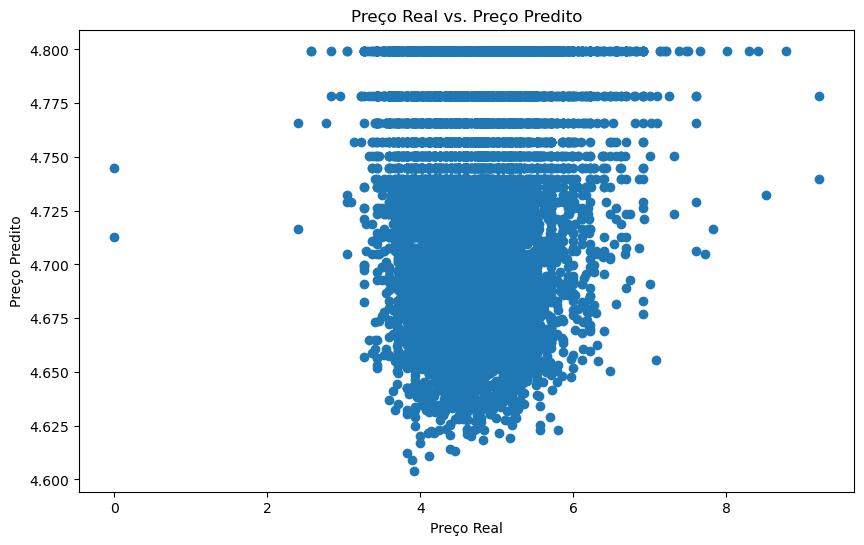

In [34]:
def testar_hipotese_numero_avaliacoes(data):
    data_ = data.dropna(subset=['numero_de_reviews', 'price'])
    X = data_[['numero_de_reviews']]
    y = data_['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Hipótese 5: O número de avaliações (numero_de_reviews) pode influenciar a percepção de valor e, consequentemente, o preço.")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Preço Real')
    plt.ylabel('Preço Predito')
    plt.title('Preço Real vs. Preço Predito')
    plt.show()

testar_hipotese_numero_avaliacoes(data)

# Algoritmo que auxilia na escolha de investimento:

Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

A análise abaixo se baseou na estabilidade do local de investimento, por mais que existam nos dados cidade que tenham uma ou até 3 acomodações mais rentáveis que Manhattan, quando são analizados todo o conjunto de seus bairros, Manhattan possui a maior estabilidade de investimento onde todas as suas acomodações custam pelo menos 250 dolares enquanto os demais, para um mesmo tipo de acomodação variam mais de 700 dolares entre si, levando em conta apenas o contexto geográfico Manhattan é a melhor opção para investir.

In [35]:
data_neighborhood = data_original[['bairro_group', 'bairro', 'room_type', 'price']].copy()

data_neighborhood = data_neighborhood.groupby(['bairro_group', 'bairro', 'room_type']).agg({'price': 'median'}).reset_index().sort_values(by='price', ascending=False)
data_neighborhood = data_neighborhood.sort_values(by='price', ascending=False)

data_neighborhood_best = data_neighborhood.head(100)

room_type_selected = data_neighborhood_best['room_type'].value_counts().index[0]
bairro_group_selected = data_neighborhood.groupby('bairro_group', ).agg({'price': 'median'}).sort_values(by='price', ascending=False).index[0]
bairros_selected = data_neighborhood[data_neighborhood['bairro_group'] == bairro_group_selected].sort_values(by='price', ascending=False).head(10)

print(f'A cidade onde seria mais adequado investir é: { bairro_group_selected}')
print(f'Nela, os bairros mais atrativos são: {bairros_selected["bairro"].values}')
print(f'E ainda, o tipo de quarto mais rentável é: {room_type_selected}')

A cidade onde seria mais adequado investir é: Manhattan
Nela, os bairros mais atrativos são: ['Tribeca' 'Flatiron District' 'SoHo' 'NoHo' 'Theater District' 'Midtown'
 'Nolita' 'Chelsea' 'Battery Park City' 'Financial District']
E ainda, o tipo de quarto mais rentável é: Entire home/apt


# Analise de correlação entre o número mínimo de noites e a disponibilidade com o preço:

O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

Na análise exploratória foram realizados testes que buscavam essa informação e eles se mostraram inconclusivos, por isso nessa análise atual serão realizados outros testes que analizam a correlação diretamente, aplica-se um modelo não linear de teste, avalia-se o residuo do modelo de regressão linear para verificar se ele está coletando corretamente a relação entre os dados e a realização de testes de significância estatística nos coeficientes.

#### Correlação direta

O resultado da correlação não indicou interferência do minimo de noites no preço da acomodação. Mas indicou que a disponibilidade por ano interfere de forma fraca/moderada nos valores.

In [36]:
correlation = data['minimo_noites'].corr(data['price'])
print(f'Correlação entre minimo_noites e price: {correlation}')

correlation = data['disponibilidade_365'].corr(data['price'])
print(f'Correlação entre disponibilidade_365 e price: {correlation}')

Correlação entre minimo_noites e price: 0.04938764517404024
Correlação entre disponibilidade_365 e price: -0.325040912914997


#### Avaliação residual

Os dados não apresentam heterocedasticidade, o que indica que o modelo de regressão linear está ajustado corretamente.

Hipótese 3: O número mínimo de noites (minimo_noites) pode afetar o preço.
Mean Squared Error: 0.4610780866226103
R^2 Score: 0.003053591573284997


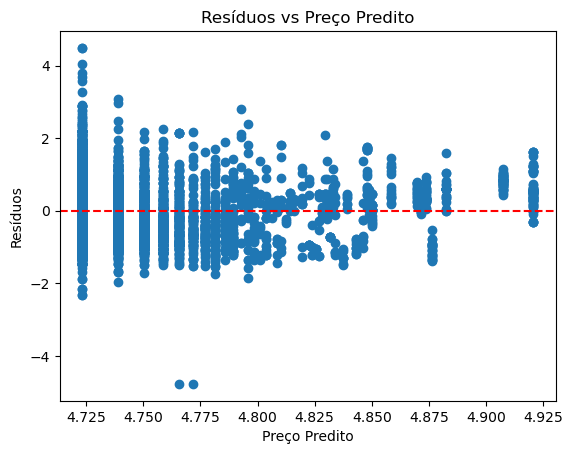

In [37]:
y_test, y_pred = testar_hipotese_minimo_noites(data, show_plot=False)

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Preço Predito')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Preço Predito')
plt.show()

Hipótese 4: A disponibilidade ao longo do ano (disponibilidade_365) pode estar correlacionada com o preço.
Mean Squared Error: 0.4128061256479213
R^2 Score: 0.10742757836138506


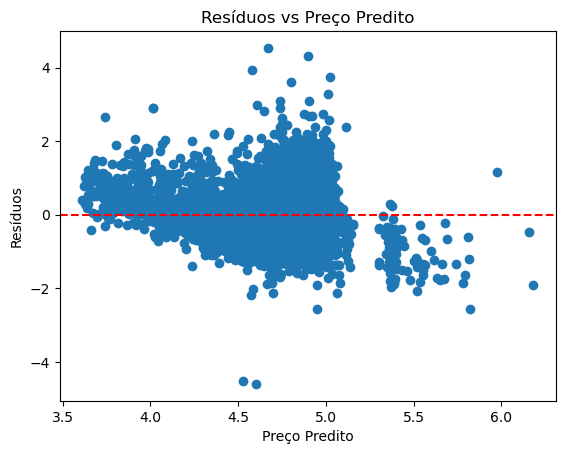

In [38]:
y_test, y_pred = testar_hipotese_disponibilidade(data, show_plot=False)

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Preço Predito')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Preço Predito')
plt.show()

#### Modelagem não linear

Segundo os modelos não lineares aplicados abaixo,  a disponibilidade por ano da acomodação tem uma relação fraca a moderada com o preço, mas não é um preditor muito forte. Dos modelos aplicado, o Gradient Boosting é o único que sugere que essa variável pode ter algum impacto, o MSE desse modelo foi o menor entre os três modelos para essa variável e o seu R² o mais significativo, por mais que não fosse alto, o que indica que as previsões desse modelo são um pouco mais precisas, mas ainda assim não refletem uma forte influência da feature no preço.

Ao análizar os valores apresnetados para a feature de mínimo de noite não é possível garantir que o número mínimo de noites tenha uma relação significativa com o preço das acomodações, com base nesses modelos utilizados, todos eles apresentam valores de R² muito baixos o que sugere que a variável não é um preditor forte do preço. Ainda, o MSE também não é muito baixo, o que confirma que as previsões feitas pelos modelos não estão tão precisas.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def testar_modelos_nao_lineares(data, random_state=42, show_plot=True, column= ''):
    X = data[[column]]
    y = data['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    models = {
        "Árvore de Decisão": DecisionTreeRegressor(random_state=random_state),
        "Random Forest": RandomForestRegressor(random_state=random_state),
        "Gradient Boosting": GradientBoostingRegressor(random_state=random_state)
    }
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Modelo: {name}")
        print(f"Mean Squared Error: {mse}")
        print(f"R^2 Score: {r2}")
        print("-" * 30)
        
        if show_plot:
            plt.figure(figsize=(10, 6))
            plt.scatter(y_test, y_pred)
            plt.xlabel('Preço Real')
            plt.ylabel('Preço Predito')
            plt.title(f'Preço Real vs. Preço Predito ({name})')
            plt.show()


print('Testando modelo não linear para minimo_noites')
testar_modelos_nao_lineares(data, random_state=42, show_plot=False, column='minimo_noites')
print('\nTestando modelo não linear para disponibilidade_365')
testar_modelos_nao_lineares(data, random_state=42, show_plot=False, column='disponibilidade_365')


Testando modelo não linear para minimo_noites
Modelo: Árvore de Decisão
Mean Squared Error: 0.42648326695275135
R^2 Score: 0.07785476348034415
------------------------------
Modelo: Random Forest
Mean Squared Error: 0.42650774565037786
R^2 Score: 0.07780183546144714
------------------------------
Modelo: Gradient Boosting
Mean Squared Error: 0.4276979004725835
R^2 Score: 0.07522847400729327
------------------------------

Testando modelo não linear para disponibilidade_365
Modelo: Árvore de Decisão
Mean Squared Error: 0.5415063604023301
R^2 Score: -0.1708490097582791
------------------------------
Modelo: Random Forest
Mean Squared Error: 0.48338655238541606
R^2 Score: -0.045181936127998146
------------------------------
Modelo: Gradient Boosting
Mean Squared Error: 0.3678151033181468
R^2 Score: 0.20470749563454582
------------------------------


#### Conclusão a partir do que foi apresentado pelos algoritmos

A disponibilidade pode ter alguma influência sobre o preço da acomodação mas não é algo muito relevante e o mínimo de noites de reserva não tem nenhuma influência sobre o preço, essas afirmações são com base nos dados estatísticos obtidos.

# Analise de associação entre preço e nome do local:

Existe algum padrão no texto do nome do local para lugares de mais alto valor?

### Análise de PCA

O PCA não consegue reduzir dimensionalidade de forma eficaz porque as features do TF-IDF são muito dispersas e não possuem padrões fortes. Isso indica que o nome da acomodação pode não ser um fator relevante para prever o preço, pois não há componentes dominantes capturando a informação.

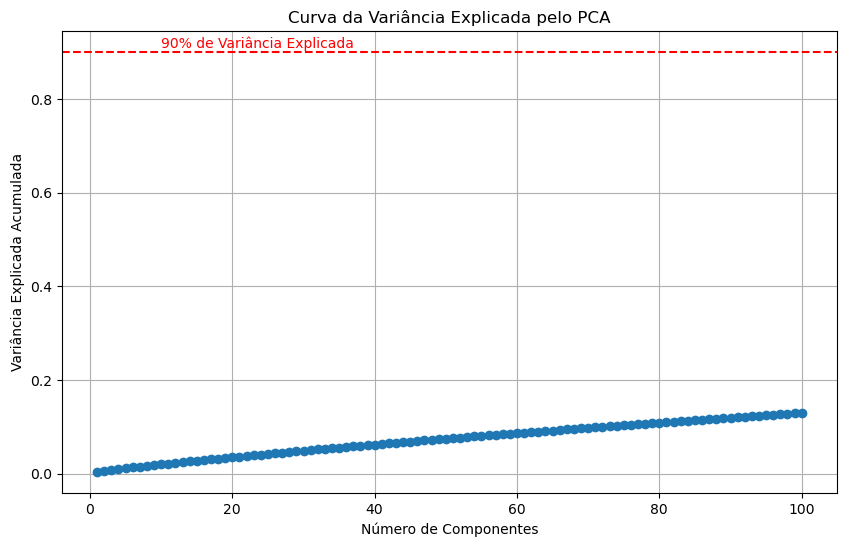

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler(with_mean=False)
X_tfidf_scaled = scaler.fit_transform(nome_tfidf_matrix)

pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_tfidf_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Curva da Variância Explicada pelo PCA')
plt.grid()

plt.axhline(y=0.90, color='r', linestyle='--')
plt.text(10, 0.91, '90% de Variância Explicada', color='red')

plt.show()


### Modelos Preditivos para analisar correlação

Os resultados mostram que os modelos conseguiram captar alguma relação entre o nome da acomodação e seu preço, mas essa influência é moderada a fraca, ou seja, o nome da acomodação tem um leve impacto no preço, mas sozinho não é suficiente para prever com precisão.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

X = nome_tfidf_matrix
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Regressão Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

save_path = './'
for name, model in models.items():
    model.fit(X_train, y_train)
    filename = f"{save_path}{name.replace(' ', '_')}_nome_price.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Modelo: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")
    print("-" * 30)


Modelo: Regressão Ridge
Mean Squared Error: 0.2743819975707588
R² Score: 0.40672923968514263
------------------------------
Modelo: Random Forest
Mean Squared Error: 0.29859832236520956
R² Score: 0.35436852524311613
------------------------------
Modelo: Gradient Boosting
Mean Squared Error: 0.3201454660554361
R² Score: 0.3077791336908604
------------------------------


# Predição de preço a partir das demais features:

#### Treinamento e Seleção do melhor modelo

Testando algoritmos de machine learning para definir o que melhor se aplica ao contexto de dados

In [ ]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor

nome_tfidf_df = pd.DataFrame(nome_tfidf_matrix.toarray())
nome_tfidf_df.index = data.index
X = pd.concat([data.drop(columns=['price', 'id']), nome_tfidf_df], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "BayesianRidge": BayesianRidge(),
    "DecisionTree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

init_results = {}

for name, model in models.items():
    cv_mse = np.mean(cross_val_score(model, X_train, y_train, cv=2, scoring='neg_mean_squared_error'))
    cv_r2 = np.mean(cross_val_score(model, X_train, y_train, cv=2, scoring='r2'))
    
    init_results[name] = {"MSE": -cv_mse, "R²": cv_r2}

best_model_name = max(init_results, key=lambda x: init_results[x]["R²"])
best_model = models[best_model_name]

best_model.fit(X_train, y_train)

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"Melhor modelo: {best_model_name}")
print(pd.DataFrame(init_results))


#### Seleção das features que participarão da aplicação do modelo

                        Variável  Importância
1                      room_type     0.383422
8            disponibilidade_365     0.171485
7  calculado_host_listings_count     0.137785
6                reviews_por_mes     0.073910
4                      longitude     0.052502
3                       latitude     0.050729
2              numero_de_reviews     0.040417
5                  minimo_noites     0.031617


c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


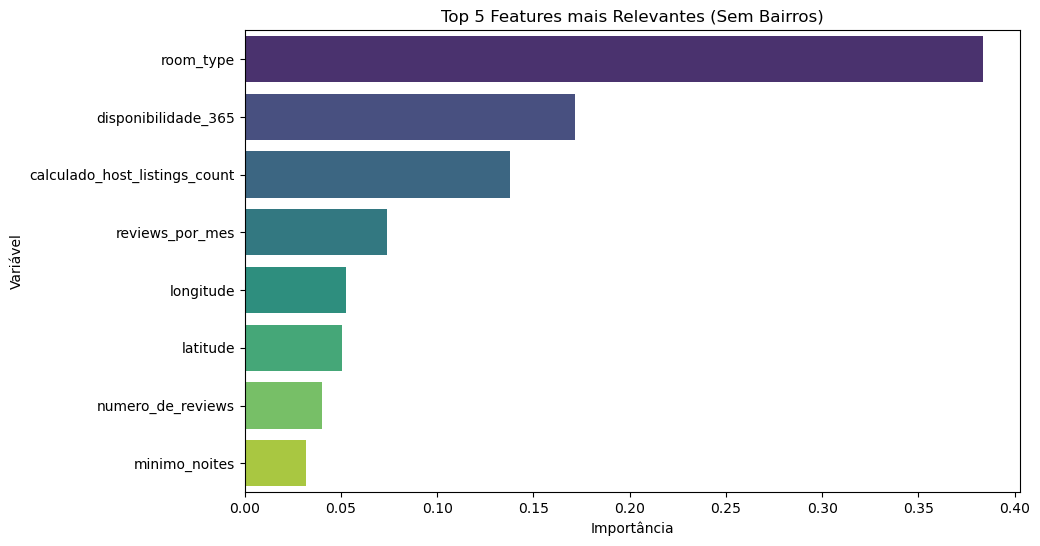

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


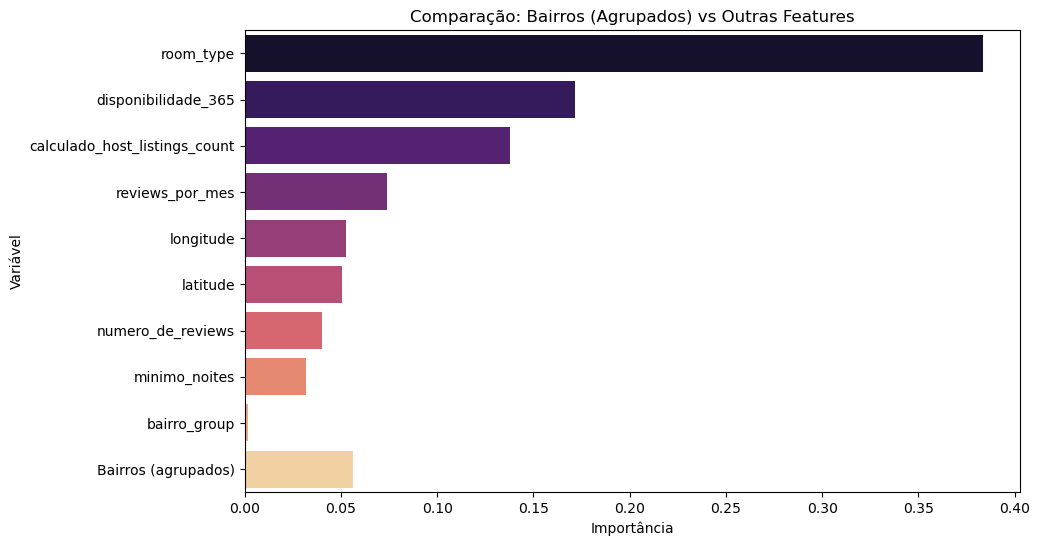

c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


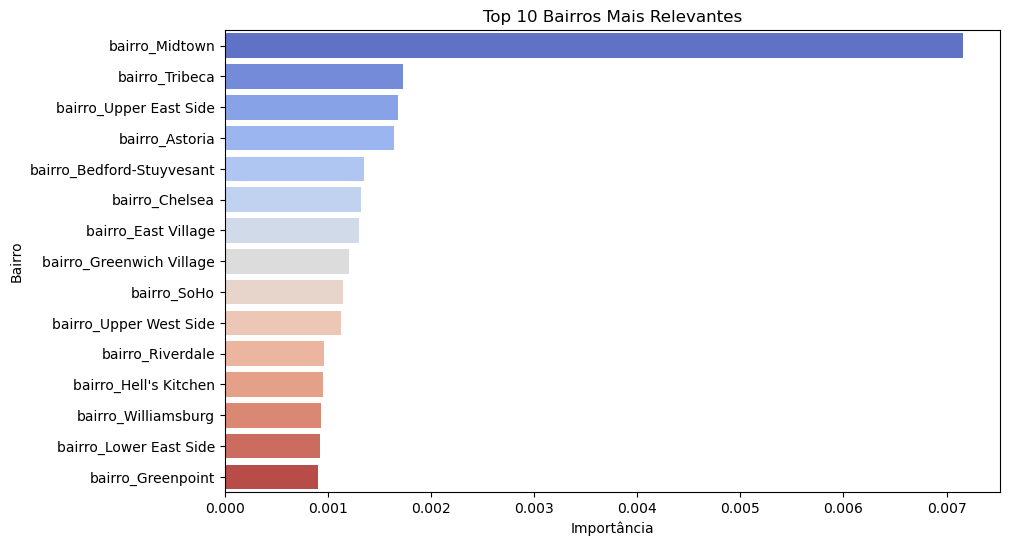


Novas features selecionadas:
Features Gerais: ['room_type', 'disponibilidade_365', 'calculado_host_listings_count', 'reviews_por_mes', 'longitude', 'latitude', 'numero_de_reviews', 'minimo_noites']
Bairros Selecionados: ['bairro_Midtown', 'bairro_Tribeca', 'bairro_Upper East Side', 'bairro_Astoria', 'bairro_Bedford-Stuyvesant', 'bairro_Chelsea', 'bairro_East Village', 'bairro_Greenwich Village', 'bairro_SoHo', 'bairro_Upper West Side', 'bairro_Riverdale', "bairro_Hell's Kitchen", 'bairro_Williamsburg', 'bairro_Lower East Side', 'bairro_Greenpoint']
Dataset filtrado salvo como 'filtered_data.csv'.


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

with open("best_model.pkl", "rb") as f:
    best_model = pickle.load(f)

if 'feature_importance_df' not in locals():
    feature_importance_df = pd.DataFrame({
        "Variável": X.columns,
        "Importância": best_model.feature_importances_}).sort_values(by="Importância", ascending=False)


bairros_cols = [col for col in X.columns if col.startswith("bairro_") and not( col.endswith("group"))]
bairro_importancia_total = feature_importance_df[feature_importance_df["Variável"].isin(bairros_cols)]["Importância"].sum()

feature_importance_df_no_bairros = feature_importance_df[~feature_importance_df["Variável"].isin(bairros_cols)]

feature_importance_with_bairros = pd.concat([
    feature_importance_df_no_bairros,
    pd.DataFrame([{"Variável": "Bairros (agrupados)", "Importância": bairro_importancia_total}])
], ignore_index=True)

top_features_df = feature_importance_df_no_bairros.head(8)
top_bairros_df = feature_importance_df[feature_importance_df["Variável"].isin(bairros_cols)].head(15)
print(top_features_df)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features_df["Importância"], y=top_features_df["Variável"], palette="viridis")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.title("Top 5 Features mais Relevantes (Sem Bairros)")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_with_bairros["Importância"], y=feature_importance_with_bairros["Variável"], palette="magma")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.title("Comparação: Bairros (Agrupados) vs Outras Features")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=top_bairros_df["Importância"], y=top_bairros_df["Variável"], palette="coolwarm")
plt.xlabel("Importância")
plt.ylabel("Bairro")
plt.title("Top 10 Bairros Mais Relevantes")
plt.show()

top_5_features = top_features_df["Variável"].tolist()
top_10_bairros = top_bairros_df["Variável"].tolist()

filtered_data = data[top_5_features + top_10_bairros + ["price"]]
filtered_data.to_csv("filtered_data.csv", index=False)

print("\nNovas features selecionadas:")
print("Features Gerais:", top_5_features)
print("Bairros Selecionados:", top_10_bairros)
print("Dataset filtrado salvo como 'filtered_data.csv'.")


### Treinamento do modelo e validaçãode seus resultados


Comparação entre os modelos:
      Modelo       MSE        R²
0   Original  0.199936  0.591212
1  Otimizado  0.190126  0.592322


c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GessicadeSouzaSilva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

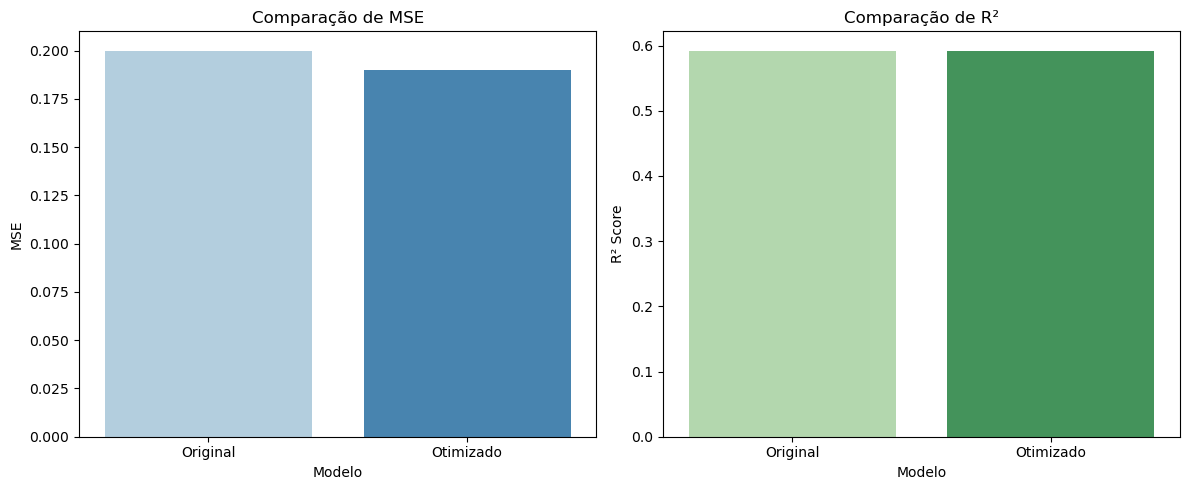

In [49]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

filtered_data = pd.read_csv("filtered_data.csv")

X = filtered_data.drop(columns=['price'])
y = filtered_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



new_model = type(best_model)(**best_model.get_params())
new_model.fit(X_train, y_train) 
y_pred_new = new_model.predict(X_test)

old_mse = init_results[best_model_name]["MSE"]
old_r2 = init_results[best_model_name]["R²"]

new_mse = mean_squared_error(y_test, y_pred_new)
new_r2 = r2_score(y_test, y_pred_new)

with open("optimized_model.pkl", "wb") as f:
    pickle.dump(new_model, f)

comparison_df = pd.DataFrame({
    "Modelo": ["Original", "Otimizado"],
    "MSE": [old_mse, new_mse],
    "R²": [old_r2, new_r2]
})
print("\nComparação entre os modelos:")
print(comparison_df)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x=comparison_df["Modelo"], y=comparison_df["MSE"], ax=axes[0], palette="Blues")
axes[0].set_title("Comparação de MSE")
axes[0].set_ylabel("MSE")

sns.barplot(x=comparison_df["Modelo"], y=comparison_df["R²"], ax=axes[1], palette="Greens")
axes[1].set_title("Comparação de R²")
axes[1].set_ylabel("R² Score")

plt.tight_layout()
plt.show()


# Sugestão de preço usando algoritmo preditivo:

### Tratamento do novo dado

In [50]:
import pandas as pd

new_data = {'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt', 
 'minimo_noites': 1,
 'numero_de_reviews': 45, 
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38, 
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355
 }

new_data_df = pd.DataFrame(new_data, index=[0])
new_data_df = new_data_df.drop(columns=['host_id', 'host_name', 'ultima_review', 'id'])
new_data_df['nome'] = new_data_df['nome'].apply(clean_text)
new_data_df['nome'] = new_data_df['nome'].apply(stopword_removal)
new_data_df['nome'] = new_data_df['nome'].apply(lemmatization)
new_data_df['nome'] = new_data_df['nome'].apply(lambda x: ' '.join(x))

aux_df = pipeline_norm_num_var.fit_transform(data)
aux_df = pd.DataFrame(aux_df, columns=columns_to_transform)
aux_preserv = new_data_df[columns_preserved]
new_data_df = pd.concat([aux_preserv, aux_df], axis=1)

new_data_df['room_type'] = encode_categorical_features(new_data_df, 'room_type', label_encoder)
new_data_df = encode_categorical_features(new_data_df, 'bairro', encoder_oh, True)
new_data_df['bairro_group'] = encode_categorical_features(new_data_df, 'bairro_group', label_encoder)

new_data_tfidf = vectorizer_tfidf.fit_transform(new_data_df['nome'])
new_data_tfidf = pd.DataFrame(new_data_tfidf.toarray())
new_data_tfidf.index = new_data_df.index
new_data_df = pd.concat([new_data_df.drop(columns=['name']), new_data_tfidf], axis=1)

{'id': 2595, 'nome': 'Skylit Midtown Castle', 'host_id': 2845, 'host_name': 'Jennifer', 'bairro_group': 'Manhattan', 'bairro': 'Midtown', 'latitude': 40.75362, 'longitude': -73.98377, 'room_type': 'Entire home/apt', 'minimo_noites': 1, 'numero_de_reviews': 45, 'ultima_review': '2019-05-21', 'reviews_por_mes': 0.38, 'calculado_host_listings_count': 2, 'disponibilidade_365': 355}


In [ ]:
import pickle
import numpy as np

with open("optimized_model.pkl", "rb") as f:
    best_model = pickle.load(f)

X_new_data = new_data_df.drop(columns=['price']).copy()
y_pred_new_data = best_model.predict(X_new_data)
y_pred_new_data = np.expm1(y_pred_new_data)

print(f'O preço desse imovel é: {y_pred_new_data: .2f}.')

# Vídeo explicativo:

Disponível no link abaixo.